<a href="https://colab.research.google.com/github/gabriel9411/intro-git/blob/master/Trabalho_Fut_MP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gabriel Matheus da S Santos
##Ra:20.84144-2@maua.br

In [ ]:
!pip install hmmlearn

In [ ]:




from matplotlib import cm 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import sys
sns.set_style('darkgrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_jogos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/england-premier-league-matches-2018-to-2019-stats.csv')
df_jogos.sample(3)

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
217,1547388900,Jan 13 2019 - 2:15pm,complete,NaN,Everton,AFC Bournemouth,Anthony Taylor,1.64,0.90,1.79,0.84,2,0,2,0,0,0,"61,90'5",NaN,5,9,5,0,0,0,1,4,0,0,16,17,4,8,12,9,17,8,51,49,1.66,2.11,3.30,52,91,68,43,15,58,77,12.24,2.00,1.71,4.05,5.00,1.20,1.65,2.60,0.0,1.62,2.05,Goodison Park (Liverpool)
138,1543759500,Dec 02 2018 - 2:05pm,complete,NaN,Arsenal,Tottenham Hotspur,Mike Dean,2.00,2.63,2.37,1.74,4,2,6,3,1,2,"10,56,74,77","30,34",8,5,3,0,4,1,1,2,2,3,23,12,8,7,15,5,12,16,55,45,2.40,1.52,2.60,54,88,46,21,7,34,60,10.63,3.21,2.60,3.55,2.75,1.15,1.50,2.25,0.0,1.45,2.55,Emirates Stadium (London)
79,1538926200,Oct 07 2018 - 3:30pm,complete,NaN,Liverpool,Manchester City,Martin Atkinson,3.00,2.33,2.79,2.32,0,0,0,0,0,0,NaN,NaN,2,6,1,0,3,0,0,1,1,2,8,7,3,3,5,4,9,10,52,48,1.06,0.97,2.84,17,84,50,33,17,50,84,15.00,2.34,2.60,3.50,2.75,1.20,1.62,2.60,0.0,1.54,2.30,Anfield (Liverpool)


In [ ]:
df_times= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/england-premier-league-teams-2018-to-2019-stats.csv')
df_times.sample(3)

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,wins_away,draws,draws_home,draws_away,losses,losses_home,losses_away,points_per_game,points_per_game_home,points_per_game_away,league_position,league_position_home,league_position_away,performance_rank,goals_scored,goals_conceded,goal_difference,total_goal_count,total_goal_count_home,total_goal_count_away,goals_scored_home,goals_scored_away,goals_conceded_home,goals_conceded_away,goal_difference_home,goal_difference_away,minutes_per_goal_scored,minutes_per_goal_scored_home,minutes_per_goal_scored_away,minutes_per_goal_conceded,...,leading_at_half_time_percentage_away,draw_at_half_time_percentage,draw_at_half_time_percentage_home,draw_at_half_time_percentage_away,losing_at_half_time_percentage,losing_at_half_time_percentage_home,losing_at_half_time_percentage_away,corners_per_match,corners_per_match_home,corners_per_match_away,cards_per_match,cards_per_match_home,cards_per_match_away,over65_corners_percentage,over75_corners_percentage,over85_corners_percentage,over95_corners_percentage,over105_corners_percentage,over115_corners_percentage,over125_corners_percentage,over135_corners_percentage,prediction_risk,goals_scored_min_0_to_10,goals_scored_min_11_to_20,goals_scored_min_21_to_30,goals_scored_min_31_to_40,goals_scored_min_41_to_50,goals_scored_min_51_to_60,goals_scored_min_61_to_70,goals_scored_min_71_to_80,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90
3,Leicester City FC,Leicester City,2018/2019,England,38,19,19,0,15,8,7,7,3,4,16,8,8,1.37,1.42,1.32,9,11,7,9,51,48,3,99,44,55,24,27,20,28,4,-1,67,71,63,71,...,11,39,37,42,42,37,47,5.53,5.68,5.37,1.76,1.95,1.58,92,84,74,68,57,42,32,21,68,1,4,5,3,4,7,5,8,14,8,5,1,7,6,4,7,1,9
9,Manchester United FC,Manchester United,2018/2019,England,38,19,19,0,19,10,9,9,6,3,10,3,7,1.74,1.89,1.58,6,6,4,6,65,54,11,119,58,61,33,32,25,29,8,3,53,52,54,63,...,42,32,37,26,24,16,32,5.26,6.11,4.42,2.13,1.79,2.47,92,82,63,53,47,37,28,18,76,5,6,9,9,7,6,5,8,10,3,6,9,1,7,7,7,7,7
8,AFC Bournemouth,AFC Bournemouth,2018/2019,England,38,19,19,0,13,8,5,6,5,1,19,6,13,1.18,1.53,0.84,14,10,16,14,56,70,-14,126,55,71,30,26,25,45,5,-19,61,57,66,49,...,26,34,53,16,37,16,58,5.03,5.05,5.00,1.63,2.00,1.26,89,84,76,71,55,45,32,18,79,3,7,4,7,10,4,3,7,11,4,8,7,11,7,8,8,6,11


In [ ]:
df_jogadores= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/england-premier-league-players-2018-to-2019-stats.csv')
df_jogadores.sample(10)

,full_name,age,birthday,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
534,Tom Cairney,29,664329600,Premier League,2018/2019,Midfielder,Fulham,2198,1107,1091,Scotland,31,11,13,1,1,0,1,1,0,0,0,4,3,1,49,21,28,0,0,0.08,0.04,0.04,0.08,0.00,2198,2.01,45,71,0,2198,0.00,231,217,-1,10
249,James Tomkins,31,607129200,Premier League,2018/2019,Defender,Crystal Palace,2563,1140,1423,England,29,13,16,1,0,1,1,0,1,0,0,10,5,5,34,12,22,6,0,0.07,0.04,0.04,0.00,0.06,2563,1.19,75,88,427,2563,0.21,234,215,63,9
163,Divock Origi,25,798159600,Premier League,2018/2019,Forward,Liverpool,366,176,190,Belgium,12,2,2,3,2,1,1,0,1,0,0,7,4,3,2,0,2,0,0,0.98,0.25,0.74,1.02,0.47,122,0.49,183,31,0,366,0.00,2,42,-1,7
155,Dejan Lovren,31,615596400,Premier League,2018/2019,Defender,Liverpool,985,540,445,Croatia,13,6,5,1,1,0,0,0,0,0,0,6,3,3,7,3,4,1,0,0.09,0.00,0.09,0.17,0.00,985,0.64,141,76,985,0,0.09,170,324,15,12
346,Lewis Dunk,28,690681600,Premier League,2018/2019,Defender,Brighton & Hove Albion,3153,1550,1603,England,36,18,18,2,0,2,1,0,1,0,0,7,5,2,53,24,29,7,1,0.09,0.03,0.06,0.00,0.11,1577,1.51,59,88,450,3153,0.20,210,252,120,5
465,Richarlison de Andrade,23,863218800,Premier League,2018/2019,Forward,Everton,2679,1283,1396,Brazil,35,15,17,13,7,6,1,1,0,0,0,14,9,5,32,15,17,6,1,0.47,0.03,0.44,0.49,0.39,206,1.08,84,77,383,2679,0.24,28,250,-1,1
190,Fernando Luiz Rosa,35,484009200,Premier League,2018/2019,Midfielder,Manchester City,2381,1286,1095,Brazil,29,14,13,1,1,0,3,3,0,0,0,16,7,9,15,8,7,5,0,0.15,0.11,0.04,0.07,0.00,2381,0.57,159,82,476,794,0.19,229,139,-1,15
126,Curtis Jones,19,980812800,Premier League,2018/2019,Midfielder,Liverpool,0,0,0,England,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00,-1,-1,-1,-1
297,Jose Izquierdo,28,710463600,Premier League,2018/2019,Forward,Brighton & Hove Albion,794,365,429,Colombia,15,4,5,0,0,0,1,0,1,0,0,5,3,2,8,4,4,1,0,0.11,0.11,0.00,0.00,0.00,0,0.91,99,53,794,794,0.11,265,133,-1,21
339,Lee Peltier,33,534643200,Premier League,2018/2019,Defender,Cardiff City,1542,521,1021,England,20,6,11,0,0,0,0,0,0,0,0,6,2,4,21,9,12,4,0,0.00,0.00,0.00,0.00,0.00,0,1.23,73,77,386,0,0.23,352,391,72,21


In [ ]:
df_liga = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/england-premier-league-league-2018-to-2019-stats.csv')
df_liga.head(3)

,name,season,status,format,number_of_clubs,total_matches,matches_completed,game_week,total_game_week,progress,average_goals_per_match,average_scored_home_team,average_scored_away_team,btts_percentage,clean_sheets_percentage,prediction_risk,home_scored_advantage_percentage,home_defence_advantage_percentage,home_advantage_percentage,average_corners_per_match,average_corners_per_match_home_team,average_corners_per_match_away_team,total_corners_for_season,average_cards_per_match,average_cards_per_match_home_team,average_cards_per_match_away_team,total_cards_for_season,over_05_percentage,over_15_percentage,over_25_percentage,over_35_percentage,over_45_percentage,over_55_percentage,under_05_percentage,under_15_percentage,under_25_percentage,under_35_percentage,under_45_percentage,under_55_percentage,over_65_corners_percentage,over_75_corners_percentage,over_85_corners_percentage,over_95_corners_percentage,over_105_corners_percentage,over_115_corners_percentage,over_125_corners_percentage,over_135_corners_percentage,over_05_cards_percentage,over_15_cards_percentage,over_25_cards_percentage,over_35_cards_percentage,over_45_cards_percentage,over_55_cards_percentage,over_65_cards_percentage,over_75_cards_percentage,goals_min_0_to_10,goals_min_11_to_20,goals_min_21_to_30,goals_min_31_to_40,goals_min_41_to_50,goals_min_51_to_60,goals_min_61_to_70,goals_min_71_to_80,goals_min_81_to_90,goals_min_0_to_15,goals_min_16_to_30,goals_min_31_to_45,goals_min_46_to_60,goals_min_61_to_75,goals_min_76_to_90
0,Premier League,2018/2019,Completed,NaN,20,380,380,38,38,100,2.82,1.57,1.25,51,54,73,26,20,23,10.28,5.73,4.56,3907,3.46,1.62,1.84,1315,94,80,54,32,14,6,6,20,46,68,86,94,88,81,70,59,47,35,27,16,93,86,67,44,28,16,8,3,82,116,108,98,118,112,133,119,186,134,172,170,158,185,253


In [ ]:
df_jogos.shape

(380, 61)

In [ ]:
df_jogos.columns

Index(['timestamp', 'date_GMT', 'status', 'attendance', 'home_team_name',
       'away_team_name', 'referee', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_goal_timings', 'away_team_goal_timings',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_possession

In [ ]:
# retorna os categoricos
df_jogos.select_dtypes( include='object' ).head().columns

Index(['date_GMT', 'status', 'home_team_name', 'away_team_name', 'referee',
       'home_team_goal_timings', 'away_team_goal_timings', 'stadium_name'],
      dtype='object')

In [ ]:
# retorna os numericos
df_jogos.select_dtypes( exclude='object' ).head().columns

Index(['timestamp', 'attendance', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_possession', 'team_a_xg',
       'team_b_xg', 'average_goals_per_match_pre_match',
       'btts_percentage_pre_match', 'over_15_percentage_pre_ma

In [ ]:
df_jogos.isnull().sum().sort_values(ascending=False)

attendance                        380
away_team_goal_timings            119
home_team_goal_timings             88
stadium_name                        0
home_team_goal_count_half_time      0
                                 ... 
home_team_fouls                     0
away_team_shots_off_target          0
home_team_shots_off_target          0
away_team_shots_on_target           0
timestamp                           0
Length: 61, dtype: int64

In [ ]:
df_jogos.describe()

,timestamp,attendance,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no
count,3.800000e+02,0.0,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.0,380.000000,380.000000
mean,1.546145e+09,NaN,1.480895,1.167632,1.615500,1.198000,1.568421,1.252632,2.821053,1.252632,0.678947,0.573684,5.726316,4.555263,1.544737,0.047368,1.715789,0.076316,0.563158,1.028947,0.631579,1.160526,14.902632,11.913158,5.802632,4.878947,9.100000,7.034211,9.878947,9.944737,51.510526,48.489474,1.684053,1.385132,2.681553,50.350000,76.986842,53.431579,29.947368,13.078947,36.331579,69.007895,9.619500,3.354763,3.219421,4.471316,5.381816,1.257974,1.817684,3.095368,0.0,1.837053,1.904289
std,6.877351e+06,NaN,0.831446,0.761209,0.590587,0.534085,1.312836,1.180031,1.601312,1.143696,0.860802,0.766958,3.025632,2.731541,1.228766,0.212706,1.208267,0.275599,0.746998,1.023061,0.789812,1.054214,5.780368,4.717937,2.695740,2.329365,4.312405,3.640347,3.252128,3.417262,10.844665,10.844665,0.696330,0.572682,0.790425,19.281859,21.528709,19.770532,15.963757,10.812827,17.372090,20.733959,2.889728,1.169849,2.962683,1.906924,5.540953,0.125338,0.325979,0.847203,0.0,0.234274,0.248033
min,1.533928e+09,NaN,0.000000,0.000000,0.470000,0.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,23.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.070000,2.900000,1.120000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.540656e+09,NaN,1.000000,0.630000,1.210000,0.840000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,2.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,8.000000,4.000000,3.000000,6.000000,4.000000,8.000000,8.000000,43.000000,41.000000,1.302500,1.030000,2.460000,44.750000,72.750000,46.000000,22.000000,5.000000,27.000000,63.000000,8.887500,2.922500,1.570000,3.350000,2.300000,1.180000,1.585000,2.450000,0.0,1.690000,1.740000
50%,1.546018e+09,NaN,1.470000,1.075000,1.475000,1.160000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,14.000000,11.000000,6.000000,5.000000,9.000000,7.000000,10.000000,10.000000,52.000000,48.000000,1.650000,1.370000,2.785000,5

In [ ]:
##times['porcentagem']=times[]

In [ ]:
pd.DataFrame()

""


In [ ]:
gols = df_jogos[['timestamp', 'attendance', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_possession', 'team_a_xg',
       'team_b_xg', 'average_goals_per_match_pre_match',
       'btts_percentage_pre_match', 'over_15_percentage_pre_match',
       'over_25_percentage_pre_match', 'over_35_percentage_pre_match',
       'over_45_percentage_pre_match', 'over_15_HT_FHG_percentage_pre_match',
       'over_05_HT_FHG_percentage_pre_match',
       'average_corners_per_match_pre_match',
       'average_cards_per_match_pre_match', 'odds_ft_home_team_win',
       'odds_ft_draw', 'odds_ft_away_team_win', 'odds_ft_over15',
       'odds_ft_over25', 'odds_ft_over35', 'odds_ft_over45', 'odds_btts_yes',
       'odds_btts_no']]
gols.sample(3)

,timestamp,attendance,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no
376,1557669600,NaN,2.00,0.61,1.89,0.74,0,2,2,1,0,1,11,2,3,0,3,0,1,2,1,2,20,8,10,3,10,5,8,6,61,39,0.00,0.00,2.72,56,78,56,31,20,25,64,9.77,3.50,1.28,6.20,10.00,1.12,1.41,2.00,0.0,1.74,2.05
346,1556045100,NaN,1.63,0.88,1.42,0.84,1,1,2,1,0,1,3,4,5,0,2,0,2,3,2,0,16,10,5,4,11,6,9,14,57,43,1.75,1.28,2.79,55,79,61,27,16,39,64,9.57,3.88,2.30,3.45,3.35,1.26,1.83,3.10,0.0,1.67,2.15
338,1555768800,NaN,0.47,1.18,0.47,1.21,1,2,3,1,0,1,2,2,2,0,2,0,2,0,1,1,14,12,4,7,10,5,14,9,46,54,1.46,1.53,2.56,47,74,47,24,12,32,79,9.30,4.00,4.10,3.60,1.91,1.28,1.87,3.25,0.0,1.77,2.00


In [ ]:
gols['pontos'] = gols['home_team_goal_count'] - gols['away_team_goal_count']

for i in range(gols.shape[0]):
  if gols["pontos"].iloc[i] > 0:
    gols["pontos"].iloc[i] = 3
  elif gols["pontos"].iloc[i] < 0:
    gols["pontos"].iloc[i] = 0
  else:
    gols["pontos"].iloc[i] = 1

gols.sample(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,timestamp,attendance,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,pontos
130,1543608000,NaN,1.00,1.33,1.05,1.21,2,1,3,1,0,1,7,6,1,0,2,0,0,1,0,2,17,15,3,5,14,10,4,12,58,42,1.68,1.67,2.40,45,61,36,22,22,37,54,10.04,3.50,3.65,3.20,2.25,1.43,2.35,4.45,0.0,2.00,1.69,3
360,1556910000,NaN,1.72,0.94,1.79,0.89,2,0,2,2,2,0,8,1,0,0,2,0,0,0,1,1,21,6,7,2,14,4,7,8,61,39,2.30,0.87,2.89,50,75,53,42,14,42,61,9.45,3.66,1.69,3.95,5.65,1.25,1.80,3.00,0.0,1.77,2.00,3
4,1533996000,NaN,0.00,0.00,0.47,1.58,0,3,3,2,0,2,2,5,2,0,1,0,1,1,0,1,8,12,3,5,5,7,8,8,40,60,1.09,1.42,0.00,0,0,0,0,0,0,0,0.00,0.00,7.47,4.27,1.51,1.29,1.91,3.30,0.0,2.00,1.71,0


In [ ]:
cor_matrix=gols.corr()
cor=cor_matrix["pontos"].sort_values(ascending=False)
cor.head(40)

pontos                                 1.000000
home_team_goal_count                   0.708794
home_team_goal_count_half_time         0.455571
home_ppg                               0.432002
home_team_shots_on_target              0.401186
odds_ft_away_team_win                  0.386122
team_a_xg                              0.290788
home_team_shots                        0.262780
Pre-Match PPG (Home)                   0.233616
home_team_possession                   0.217996
odds_ft_draw                           0.201058
over_35_percentage_pre_match           0.138390
total_goal_count                       0.126440
odds_btts_yes                          0.121055
home_team_corner_count                 0.102758
home_team_shots_off_target             0.101446
away_team_first_half_cards             0.076290
over_45_percentage_pre_match           0.073120
average_goals_per_match_pre_match      0.071190
total_goals_at_half_time               0.070702
away_team_red_cards                    0

In [ ]:
df_jogos_fil = gols[['pontos', 'home_team_goal_count', 'home_team_goal_count_half_time', 'home_ppg','home_team_shots_on_target','odds_ft_away_team_win','team_a_xg','home_team_shots','Pre-Match PPG (Home)','home_team_possession']]

In [ ]:

df_jogos_fil.shape

(380, 10)

In [ ]:
corr_matrix=df_jogos_fil.corr()
corr=corr_matrix["pontos"].sort_values(ascending=False)
corr.head(40)

pontos                            1.000000
home_team_goal_count              0.708794
home_team_goal_count_half_time    0.455571
home_ppg                          0.432002
home_team_shots_on_target         0.401186
odds_ft_away_team_win             0.386122
team_a_xg                         0.290788
home_team_shots                   0.262780
Pre-Match PPG (Home)              0.233616
home_team_possession              0.217996
Name: pontos, dtype: float64

In [ ]:
corr_matrix

,pontos,home_team_goal_count,home_team_goal_count_half_time,home_ppg,home_team_shots_on_target,odds_ft_away_team_win,team_a_xg,home_team_shots,Pre-Match PPG (Home),home_team_possession
pontos,1.000000,0.708794,0.455571,0.432002,0.401186,0.386122,0.290788,0.262780,0.233616,0.217996
home_team_goal_count,0.708794,1.000000,0.694242,0.438896,0.570811,0.417506,0.375833,0.328580,0.253123,0.218633
home_team_goal_count_half_time,0.455571,0.694242,1.000000,0.298435,0.339888,0.287675,0.164343,0.135285,0.125746,0.065371
home_ppg,0.432002,0.438896,0.298435,1.000000,0.388938,0.663440,0.297378,0.292243,0.703269,0.484576
home_team_shots_on_target,0.401186,0.570811,0.339888,0.388938,1.000000,0.394466,0.687255,0.708584,0.187689,0.422415
odds_ft_away_team_win,0.386122,0.417506,0.287675,0.663440,0.394466,1.000000,0.370700,0.393515,0.503916,0.595275
team_a_xg,0.290788,0.375833,0.164343,0.297378,0.687255,0.370700,1.000000,0.856877,0.168872,0.543844
home_team_shots,0.262780,0.328580,0.135285,0.292243,0.708584,0.393515,0.856877,1.000000,0.166392,0.583839
Pre-Match PPG (Home),0.233616,0.253123,0.125746,0.703269,0.187689,0.503916,0.168872,0.166392,1.000000,0.338726
home_team_possession,0.217996,0.218633,0.065371,0.484576,0.422415,0.595275,0.543844,0.583839,0.338726,1.000000


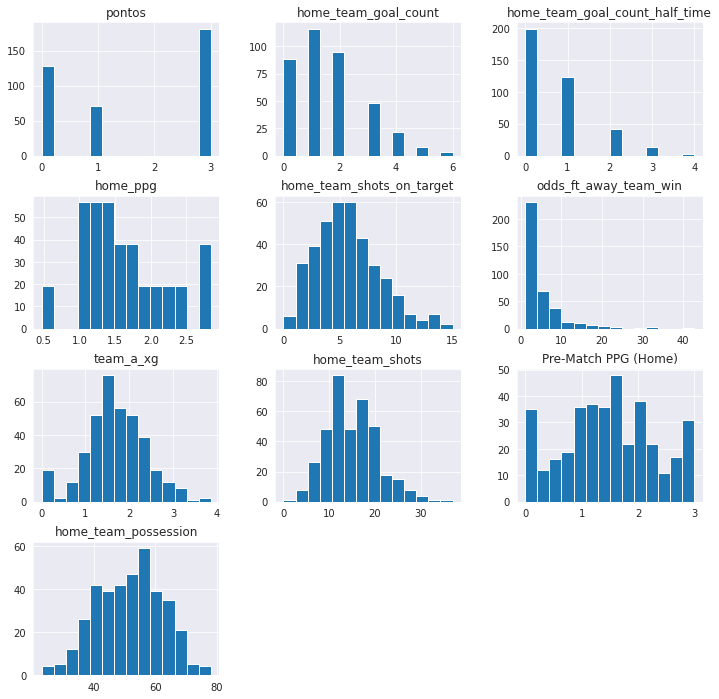

In [ ]:
df_jogos_fil.hist(bins=14,figsize=(12,12))
plt.show()

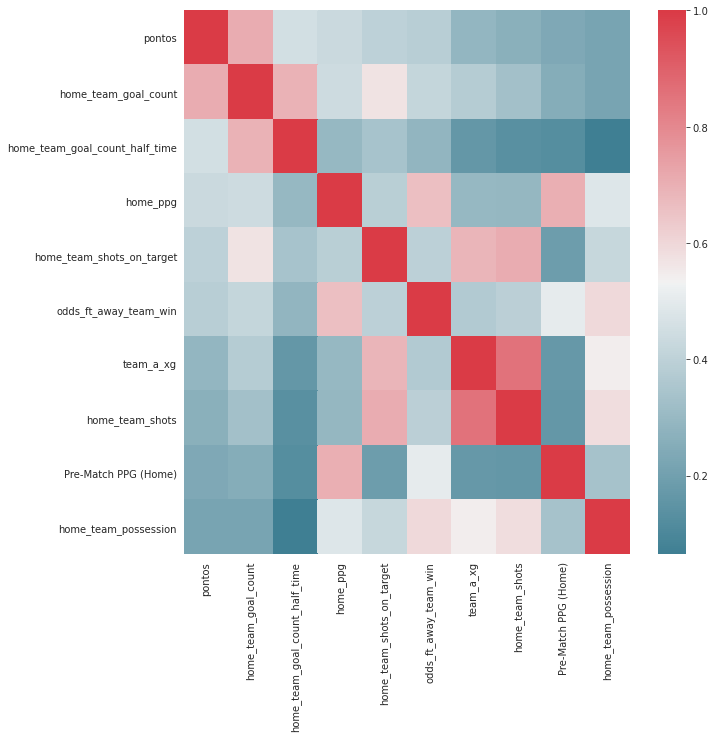

In [ ]:
correlation = df_jogos_fil.corr()
fig,ax=plt.subplots(figsize=(10,10))
colormap=sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(correlation,cmap=colormap, annot=False,fmt='.2f')

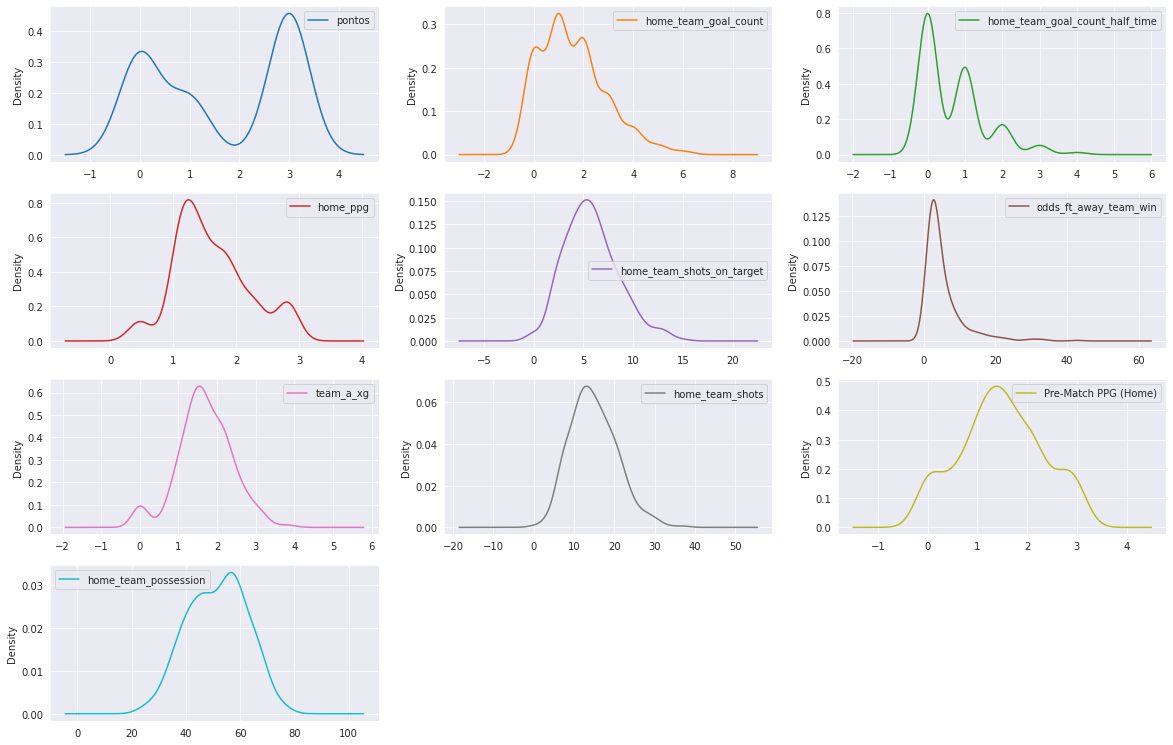

In [ ]:
df_jogos_fil.plot(kind='density', subplots = True, layout = (6,3), figsize=(20,20), sharex = False)
plt.show()

#preparar os dados

In [ ]:
x_df_jogos_fil = df_jogos_fil.drop('pontos', axis='columns')

In [ ]:
y_df_jogos_fil=df_jogos_fil.pontos

#Normalizar

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(x_df_jogos_fil)
X_scaled_array = scaler.transform(x_df_jogos_fil )
X_scaled = pd.DataFrame(X_scaled_array, columns = x_df_jogos_fil.columns)

X_scaled.sample(5)

,home_team_goal_count,home_team_goal_count_half_time,home_ppg,home_team_shots_on_target,odds_ft_away_team_win,team_a_xg,home_team_shots,Pre-Match PPG (Home),home_team_possession
95,-0.433543,-0.789778,-0.331463,0.073311,-0.358139,1.072667,0.883004,0.023009,0.506859
264,-0.433543,0.373461,-0.144962,-0.669578,-0.493673,-0.465986,-0.849270,0.444517,-0.324137
172,0.329171,0.373461,-0.144962,-0.669578,-0.231640,-0.149627,0.016867,0.095267,0.045194
6,0.329171,0.373461,0.295858,-0.298133,-0.450302,-0.207147,-0.502815,-1.783456,0.506859
152,-0.433543,0.373461,-0.687511,-0.298133,-0.466566,-0.394086,-0.329588,-1.096999,-0.416470


#Split 20/30

In [ ]:
from sklearn.model_selection import train_test_split

X_jogos_train, X_jogos_test, y_jogos_train, y_jogos_test =  train_test_split( X_scaled, y_df_jogos_fil, test_size = 0.2, random_state = 2 )


In [ ]:
X_jogos_train

,home_team_goal_count,home_team_goal_count_half_time,home_ppg,home_team_shots_on_target,odds_ft_away_team_win,team_a_xg,home_team_shots,Pre-Match PPG (Home),home_team_possession
3,-1.196257,-0.789778,-0.857057,0.444756,-0.383438,0.066072,-0.502815,-1.783456,0.783857
244,0.329171,0.373461,-0.958785,0.816201,-0.204533,0.698789,0.883004,-0.795922,-0.416470
253,-0.433543,-0.789778,-1.942154,0.444756,-0.658121,0.598130,0.536549,-1.325818,0.229860
298,0.329171,0.373461,1.279228,-0.669578,-0.430423,-0.106487,0.016867,1.263447,-0.231804
331,0.329171,0.373461,0.465405,-1.041023,0.427960,-2.421657,-1.195725,0.781724,-0.601135
...,...,...,...,...,...,...,...,...,...
299,0.329171,-0.789778,-0.144962,-0.669578,-0.331032,-0.350946,-0.329588,0.227741,0.045194
22,1.091885,0.373461,1.279228,1.930535,0.229176,0.914488,0.536549,-1.783456,0.783857
72,-1.196257,-0.789778,-0.958785,0.073311,-0.475602,0.253011,-0.156361,-1.386033,1.153188
15,1.091885,1.536699,1.007953,2.301980,-0.213569,1.662245,1.749141,-1.783456,0.414526




#classificar diferentes modelos

In [ ]:
from sklearn.linear_model import LogisticRegression

modelLG_times = LogisticRegression()
modelLG_times.fit(X_jogos_train, y_jogos_train)

teste1 = modelLG_times.score( X_jogos_test, y_jogos_test )

In [ ]:
print('teste', teste1)

teste 0.75


In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelRF_times = RandomForestClassifier()
modelRF_times.fit(X_jogos_train, y_jogos_train)
teste2 = modelRF_times.score( X_jogos_test, y_jogos_test   )

In [ ]:
print('teste2', teste2)

teste2 0.6842105263157895


In [ ]:
from sklearn.metrics import confusion_matrix

# LG V1 - Validação
y_true = y_jogos_test
y_pred = modelLG_times.predict( X_jogos_test )
confusion_matrix( y_true, y_pred )

array([[23,  2,  4],
       [ 4,  2,  3],
       [ 4,  2, 32]])

In [ ]:
from sklearn.svm import SVC   # Classificador por SVM
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report   # Métricas de qualidade

In [ ]:
modeloSVM = SVC()   # Cria instância de objeto "classificador"


In [ ]:
modeloSVM.fit(X_jogos_train,y_jogos_train)  # Treina o modelo com os dados disponíveis
 
# Calcula as previsões usando APENAS os dados de teste
y_prevSVM = modeloSVM.predict(X_jogos_test)
 
# Matriz de confusão
print("Matriz de confusão:\n",confusion_matrix(y_true = y_jogos_test,y_pred = y_prevSVM))
 
# Relatório das métricas de qualidade
print(classification_report(y_true =y_jogos_test,y_pred = y_prevSVM,digits = 4))

Matriz de confusão:
 [[24  2  3]
 [ 6  1  2]
 [ 5  0 33]]
              precision    recall  f1-score   support

           0     0.6857    0.8276    0.7500        29
           1     0.3333    0.1111    0.1667         9
           3     0.8684    0.8684    0.8684        38

    accuracy                         0.7632        76
   macro avg     0.6292    0.6024    0.5950        76
weighted avg     0.7353    0.7632    0.7401        76



In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_jogos_train,y_jogos_train)

y_pred = classifier.predict(X_jogos_test)
print('Score:', metrics.accuracy_score(y_jogos_test,y_pred))

cm = confusion_matrix(y_jogos_test, y_pred)
print("Matriz confusão", cm)

Score: 0.6842105263157895
Matriz confusão [[18  7  4]
 [ 3  5  1]
 [ 3  6 29]]


#Análise por Markov - HMM 

In [ ]:
def PreparaDados(df, time):
  df_time_fora = df[df["away_team_name"]==time]
  df_time_fora["pontos"] = df_time_fora["away_team_goal_count"] - df_time_fora["home_team_goal_count"]
  df_time_fora = df_time_fora[["away_team_name","away_team_goal_count","away_team_possession", "away_team_shots_on_target","pontos"]]
  df_time_fora["home"] = 0
  df_time_fora.rename(columns={"away_team_goal_count":"team_goal_count",
                                     "away_team_possession":"team_possession", 
                                     "away_team_shots_on_target":"team_shots_on_target"}, inplace=True)
  
  df_time_casa = df[df["home_team_name"]==time]
  df_time_casa["pontos"] = df_time_casa["home_team_goal_count"] - df_time_casa["away_team_goal_count"]
  df_time_casa = df_time_casa[["home_team_name","home_team_goal_count","home_team_possession", "home_team_shots_on_target","pontos"]]
  df_time_casa["home"] = 1
  df_time_casa.rename(columns={"home_team_goal_count":"team_goal_count",
                                     "home_team_possession":"team_possession", 
                                     "home_team_shots_on_target":"team_shots_on_target"}, inplace=True)
  
  df_time = df_time_casa.append(df_time_fora)
  df_time = df_time.drop(["home_team_name","away_team_name"], axis =1)
  df_time = df_time.reset_index(drop = True)
  
  df_time['pontos'] = df_time['pontos'].apply(lambda x: 3 if (x > 0)
                                                            else (0 if (x < 0)
 
 
                                                            else 1))
  return df_time

In [ ]:
df_times.team_name

0                     Arsenal FC
1           Tottenham Hotspur FC
2             Manchester City FC
3              Leicester City FC
4              Crystal Palace FC
5                     Everton FC
6                     Burnley FC
7                 Southampton FC
8                AFC Bournemouth
9           Manchester United FC
10                  Liverpool FC
11                    Chelsea FC
12            West Ham United FC
13                    Watford FC
14           Newcastle United FC
15               Cardiff City FC
16                     Fulham FC
17     Brighton & Hove Albion FC
18          Huddersfield Town FC
19    Wolverhampton Wanderers FC
Name: team_name, dtype: object

In [ ]:
nome_times=['Arsenal','Tottenham Hotspur','Manchester City','Leicester City','Crystal Palacel','Burnley','Southampton','AFC Bournemouth','Manchester United','Liverpool','Chelsea','West Ham United','Watford','Newcastle United','Cardiff City','Brighton & Hove Albion','Huddersfield Town','Wolverhampton Wanderers']

In [ ]:
Arsenal =  PreparaDados(df_jogos, "Arsenal") 
Tottenham_Hotspur =  PreparaDados(df_jogos, "Tottenham Hotspur") 
Manchester_City =  PreparaDados(df_jogos, "Manchester City") 
Leicester_City  =  PreparaDados(df_jogos, "Leicester City") 
Crystal_Palace =  PreparaDados(df_jogos, "Crystal Palace") 
Everton =  PreparaDados(df_jogos, "Everton") 
Burnley  =  PreparaDados(df_jogos, "Burnley") 
Southampton  =  PreparaDados(df_jogos, "Southampton") 
AFC_Bournemouth =  PreparaDados(df_jogos, "AFC Bournemouth") 
Manchester_United =  PreparaDados(df_jogos, "Manchester United") 
Liverpool =  PreparaDados(df_jogos, "Liverpool") 
Chelsea =  PreparaDados(df_jogos, "Chelsea") 
West_Ham_United =  PreparaDados(df_jogos, "West Ham United") 
Watford  =  PreparaDados(df_jogos, "Watford") 
Newcastle_United =  PreparaDados(df_jogos, "Newcastle United") 
Cardiff_City =  PreparaDados(df_jogos, "Cardiff City") 
Fulham =  PreparaDados(df_jogos, "Fulham") 
Brighton_e_Hove_Albion =  PreparaDados(df_jogos, "Brighton & Hove Albion") 
Huddersfield_Town =  PreparaDados(df_jogos, "Huddersfield Town") 
Wolverhampton_Wanderers =  PreparaDados(df_jogos, "Wolverhampton Wanderers") 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
Crystal_Palace.head()

,team_goal_count,team_possession,team_shots_on_target,pontos,home
0,0,43,4,0,1
1,0,49,7,0,1
2,0,62,5,1,1
3,0,64,6,0,1
4,2,49,4,1,1


In [ ]:
def ExtractFeatures(data):
  
        team_goal_count = np.array(data['team_goal_count'])
        team_possession = np.array(data['team_possession'])
        team_shots_on_target = np.array(data['team_shots_on_target'])
        home = np.array(data['home'])
        pontos = np.array(data['pontos'])
        

        aprov_gols = (team_goal_count /( (team_shots_on_target + 1)*(pontos+1)))
        aprov_chances = team_shots_on_target / team_possession
        result = home + pontos -1

        return np.column_stack((aprov_gols, aprov_chances, result))

In [ ]:
X_Arsenal =  ExtractFeatures(Arsenal) 
X_Tottenham_Hotspur =  ExtractFeatures(Tottenham_Hotspur) 
X_Manchester_City=  ExtractFeatures(Manchester_City) 
X_Leicester_City  =  ExtractFeatures(Leicester_City) 
X_Crystal_Palace =  ExtractFeatures(Crystal_Palace) 
X_Everton =  ExtractFeatures(Everton) 
X_Burnley  =  ExtractFeatures(Burnley) 
X_Southampton  =  ExtractFeatures(Southampton) 
X_AFC_Bournemouth =  ExtractFeatures(AFC_Bournemouth) 
X_Manchester_United =  ExtractFeatures(Manchester_United) 
X_Liverpool =  ExtractFeatures(Liverpool) 
X_Chelsea =  ExtractFeatures(Chelsea) 
X_West_Ham_United = ExtractFeatures(West_Ham_United) 
X_Watford  =  ExtractFeatures(Watford) 
X_Newcastle_United =  ExtractFeatures(Newcastle_United) 
X_Cardiff_City =  ExtractFeatures(Cardiff_City) 
X_Fulham =  ExtractFeatures(Fulham) 
X_Brighton_e_Hove_Albion =  ExtractFeatures(Brighton_e_Hove_Albion) 
X_Huddersfield_Town =  ExtractFeatures(Huddersfield_Town) 
X_Wolverhampton_Wanderers =  ExtractFeatures(Wolverhampton_Wanderers)

In [ ]:
X_Manchester_United

array([[ 0.0625    ,  0.15909091,  3.        ],
       [ 0.        ,  0.11764706,  0.        ],
       [ 0.1       ,  0.06557377,  1.        ],
       [ 0.075     ,  0.140625  ,  3.        ],
       [ 0.04545455,  0.19230769,  3.        ],
       [ 0.        ,  0.10344828,  1.        ],
       [ 0.11111111,  0.16666667,  1.        ],
       [ 0.07692308,  0.20338983,  3.        ],
       [ 0.0625    ,  0.17460317,  3.        ],
       [ 0.1       ,  0.15254237,  3.        ],
       [ 0.1       ,  0.0754717 ,  3.        ],
       [ 0.09090909,  0.15384615,  1.        ],
       [ 0.        ,  0.11428571,  1.        ],
       [ 0.09375   ,  0.11666667,  3.        ],
       [ 0.07142857,  0.13333333,  3.        ],
       [ 0.125     ,  0.06666667,  3.        ],
       [ 0.        ,  0.075     ,  0.        ],
       [ 0.08333333,  0.09615385,  1.        ],
       [ 0.        ,  0.16393443,  0.        ],
       [ 0.66666667,  0.03278689, -1.        ],
       [ 0.03846154,  0.21818182,  2.   

In [ ]:

from hmmlearn import hmm

In [ ]:



model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Arsenal )

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Arsenal ) 


In [ ]:
XN, ZN = new_model.sample(38)

In [ ]:
XN

array([[ 2.82505022e-01,  9.01828454e-02, -5.76101795e-01],
       [-9.23349693e-02,  1.71412044e-02,  1.98164997e-01],
       [-8.54850259e-02,  1.02088706e-01, -1.08748651e-01],
       [ 7.20118977e-02,  1.10405569e-01,  1.69926868e+00],
       [ 1.12647565e-01,  1.13412564e-01,  2.15344329e+00],
       [ 1.05118595e-01,  1.69800437e-01,  2.46572045e+00],
       [ 7.18961525e-02,  1.94180738e-01,  1.74696356e+00],
       [ 6.74358007e-02,  6.14668468e-02,  2.58764695e+00],
       [ 3.35372207e-02,  1.61559598e-02,  2.05070597e+00],
       [ 9.63887840e-02,  7.12897128e-02,  2.66770105e+00],
       [ 1.60866477e-01,  1.64872460e-01,  3.00435953e+00],
       [ 9.59691191e-02,  5.41814763e-02,  2.53257433e+00],
       [-1.11688855e-01,  1.04929497e-01, -5.41602942e-02],
       [ 1.42116207e-01,  9.32807007e-04, -3.52712982e-01],
       [ 2.76634042e-01,  8.74958565e-02, -4.85946311e-01],
       [ 9.40952298e-02,  2.05493710e-01,  1.89270917e+00],
       [ 7.24266619e-02,  2.13358792e-01

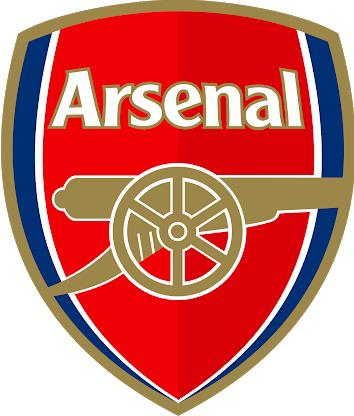**

In [ ]:
Arsenal_pontos = Arsenal['pontos']*(1+XN[:,0])

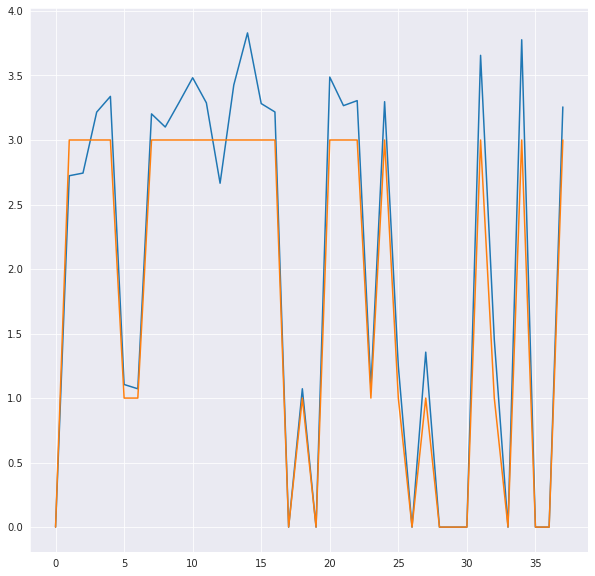

In [ ]:




plt.figure(figsize=(10,10))
plt.plot(Arsenal_pontos)
plt.plot(Arsenal['pontos'])

33    64
34    67
35    67
36    67
37    70
Name: pontos, dtype: int64
33    70.202698
34    73.979451
35    73.979451
36    73.979451
37    77.235512
Name: pontos, dtype: float64


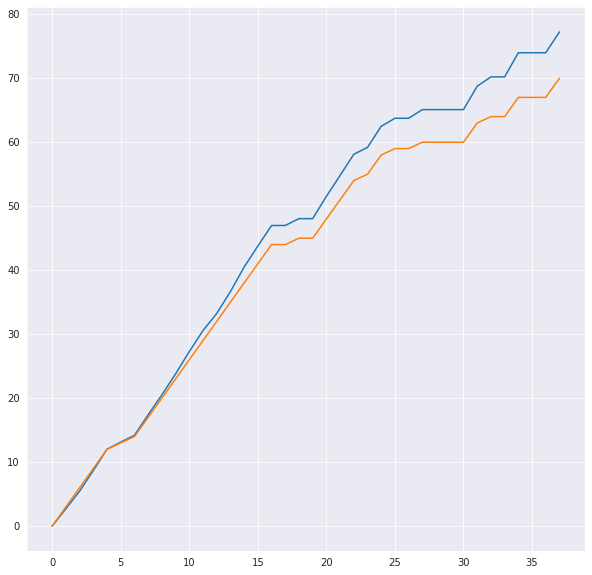

In [ ]:
total = Arsenal['pontos'].cumsum()
print(total.tail())

total_prev = Arsenal_pontos.cumsum()
print(total_prev.tail())

plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

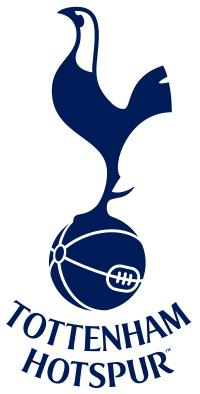

33    71
34    71
35    71
36    71
37    71
Name: pontos, dtype: int64
33    77.228525
34    77.228525
35    77.228525
36    77.228525
37    77.228525
Name: pontos, dtype: float64


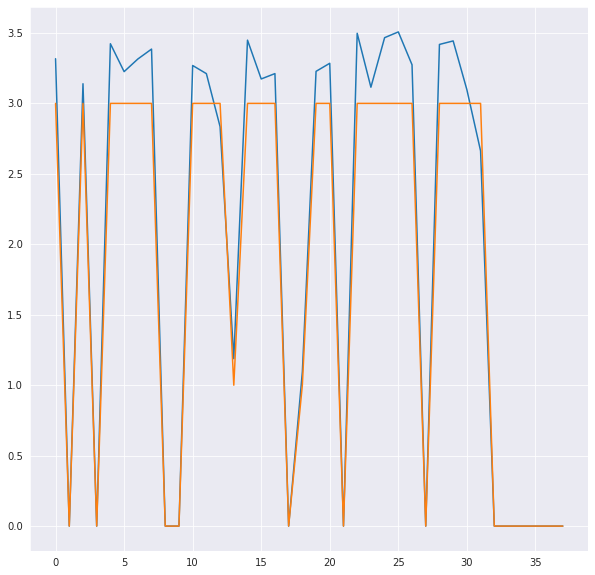

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Tottenham_Hotspur )

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Tottenham_Hotspur) 

XN, ZN = new_model.sample(38)

Tottenham_Hotspur_pontos = Tottenham_Hotspur['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Tottenham_Hotspur_pontos)
plt.plot(Tottenham_Hotspur['pontos'])


total = Tottenham_Hotspur['pontos'].cumsum()
print(total.tail())

total_prev = Tottenham_Hotspur_pontos.cumsum()
print(total_prev.tail())



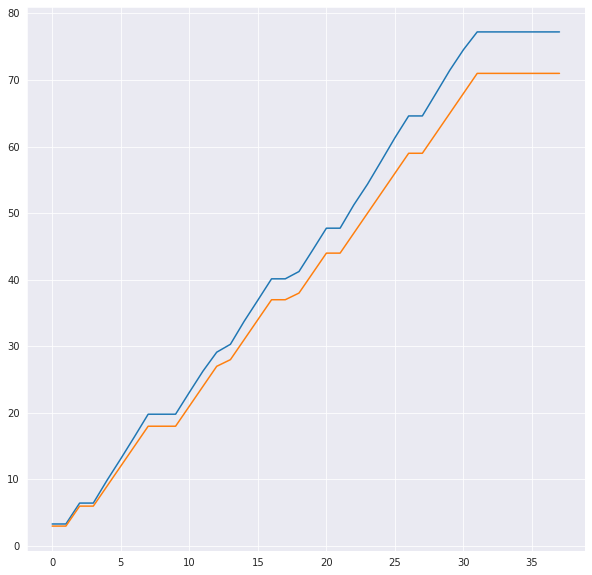

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

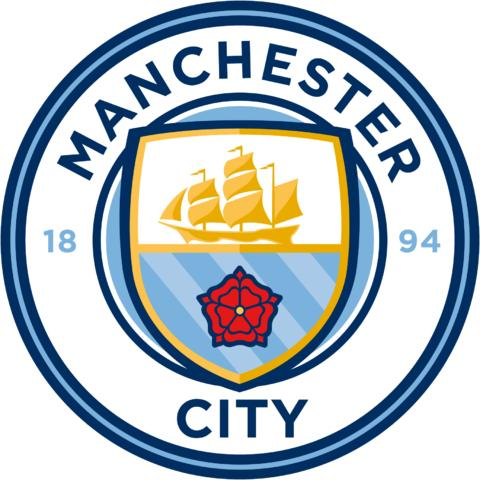

33    86
34    89
35    92
36    95
37    98
Name: pontos, dtype: int64
33     93.326398
34     96.855708
35    100.194769
36    103.616824
37    106.891511
Name: pontos, dtype: float64


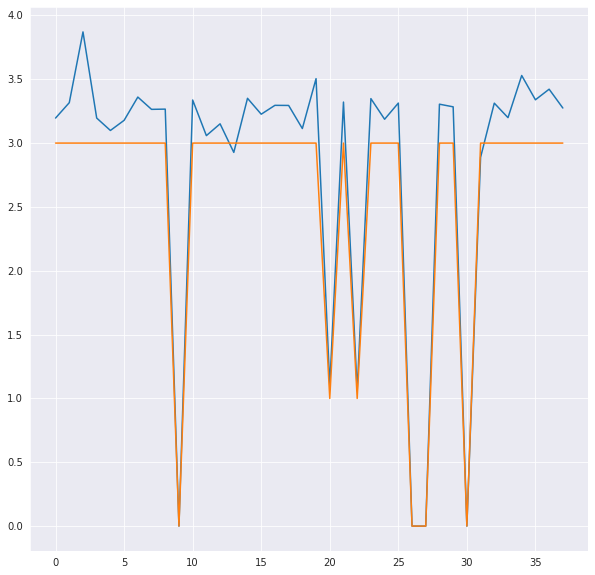

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Manchester_City )

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Manchester_City) 

XN, ZN = new_model.sample(38)

Manchester_City_pontos = Manchester_City['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Manchester_City_pontos)
plt.plot(Manchester_City['pontos'])


total = Manchester_City['pontos'].cumsum()
print(total.tail())

total_prev = Manchester_City_pontos.cumsum()
print(total_prev.tail())

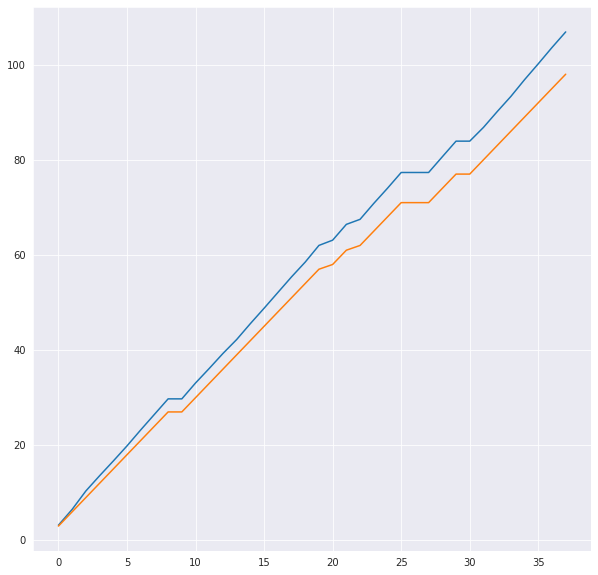

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

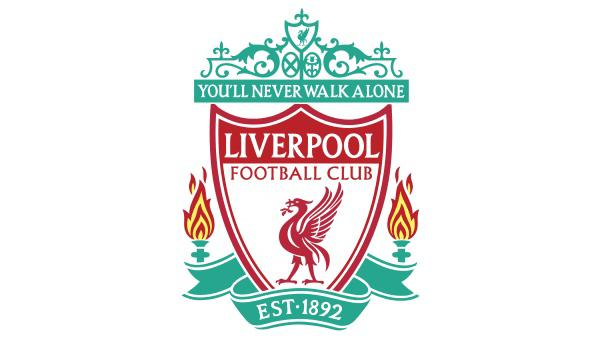

33    85
34    88
35    91
36    94
37    97
Name: pontos, dtype: int64
    team_goal_count  team_possession  team_shots_on_target  pontos  home
33               79             2009                   244      85    19
34               81             2077                   251      88    19
35               84             2141                   257      91    19
36               86             2212                   264      94    19
37               89             2272                   269      97    19


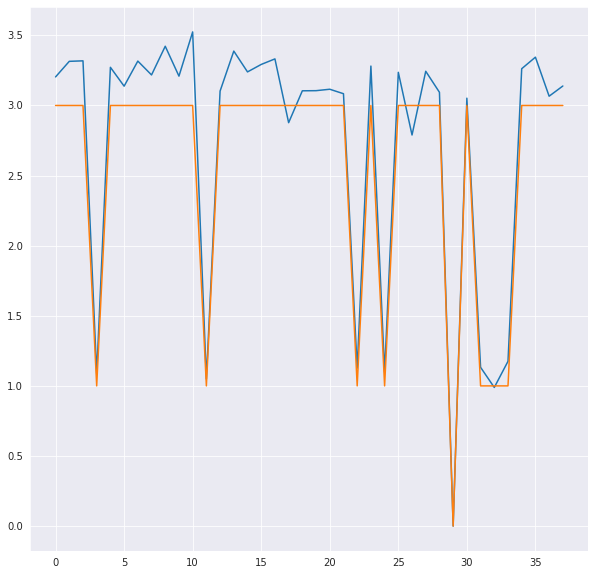

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Liverpool)

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Liverpool) 

XN, ZN = new_model.sample(38)

Liverpool_pontos = Liverpool['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Liverpool_pontos)
plt.plot(Liverpool['pontos'])


total = Liverpool['pontos'].cumsum()
print(total.tail())

total_prev = Liverpool.cumsum()
print(total_prev.tail())

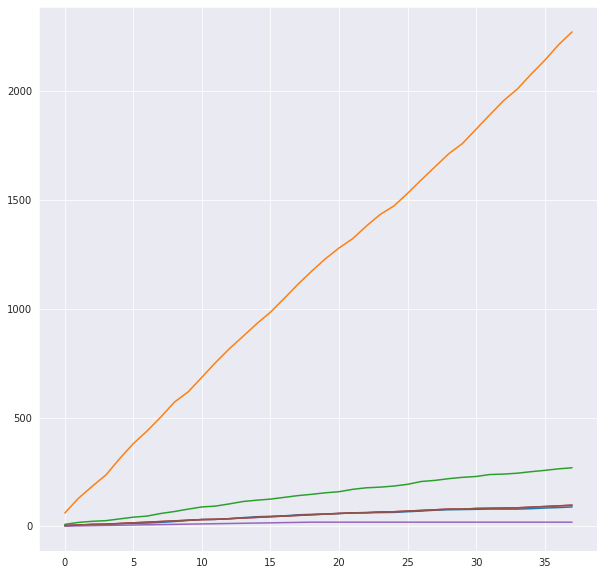

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

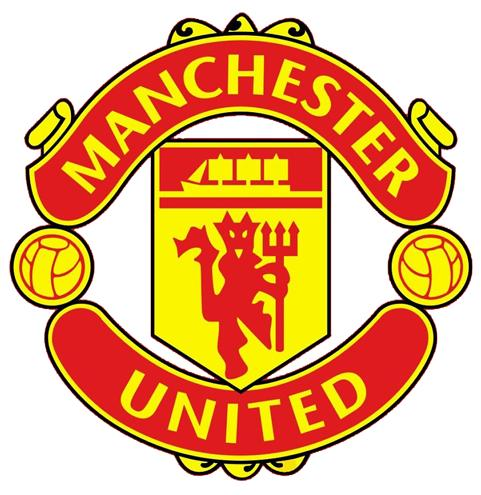

33    65
34    65
35    65
36    65
37    66
Name: pontos, dtype: int64
33    71.538969
34    71.538969
35    71.538969
36    71.538969
37    72.664621
Name: pontos, dtype: float64


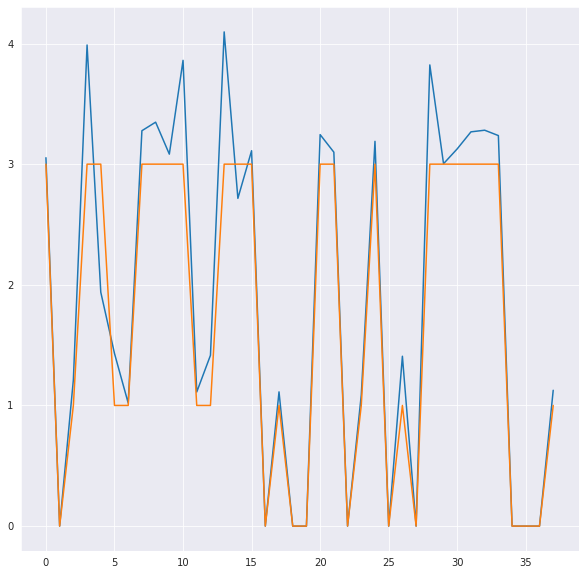

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Manchester_United)

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Manchester_United) 

XN, ZN = new_model.sample(38)
Manchester_United_pontos = Manchester_United['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Manchester_United_pontos)
plt.plot(Manchester_United['pontos'])


total =Manchester_United['pontos'].cumsum()
print(total.tail())

total_prev = Manchester_United_pontos.cumsum()
print(total_prev.tail())

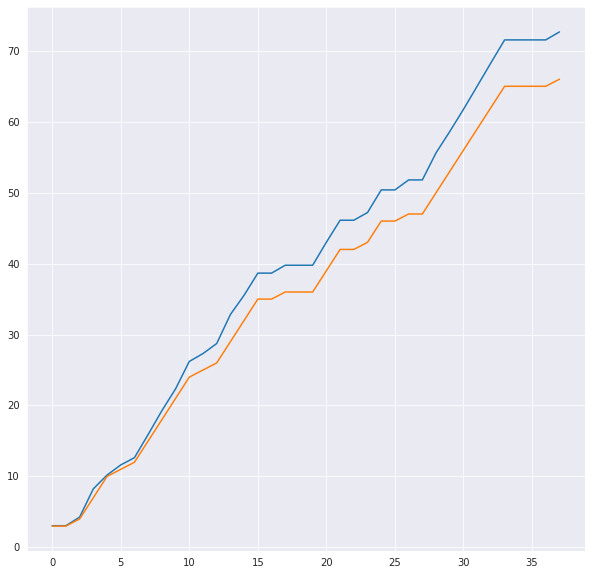

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

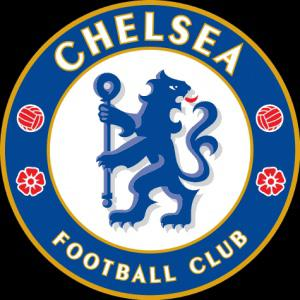

33    67
34    70
35    70
36    71
37    72
Name: pontos, dtype: int64
33    71.807992
34    74.732877
35    74.732877
36    75.825347
37    76.866247
Name: pontos, dtype: float64


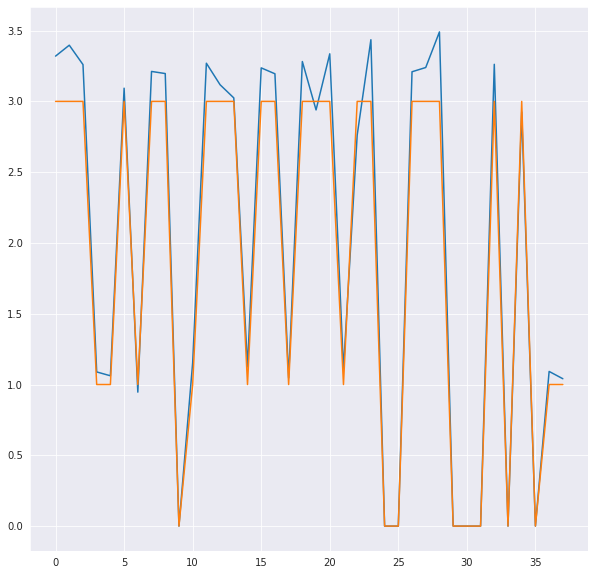

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Chelsea )

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Chelsea) 

XN, ZN = new_model.sample(38)

Chelsea_pontos = Chelsea['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Chelsea_pontos)
plt.plot(Chelsea['pontos'])


total = Chelsea['pontos'].cumsum()
print(total.tail())

total_prev = Chelsea_pontos.cumsum()
print(total_prev.tail())

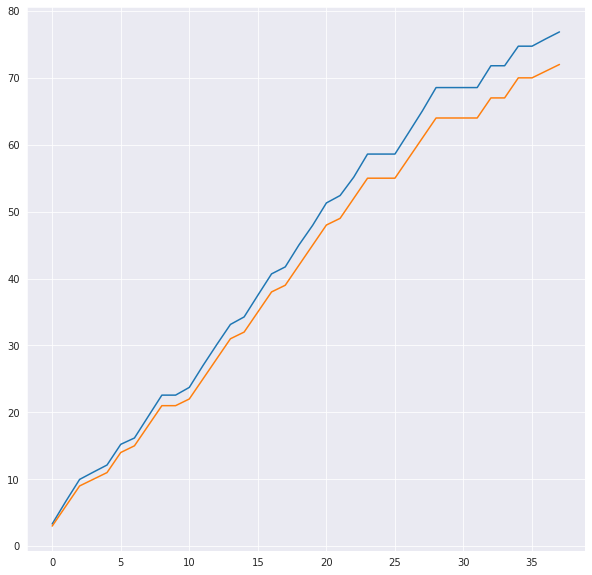

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

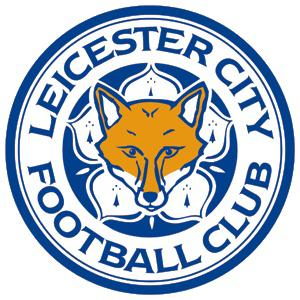

33    45
34    48
35    51
36    52
37    52
Name: pontos, dtype: int64
33    51.506029
34    54.644603
35    57.757797
36    58.784261
37    58.784261
Name: pontos, dtype: float64


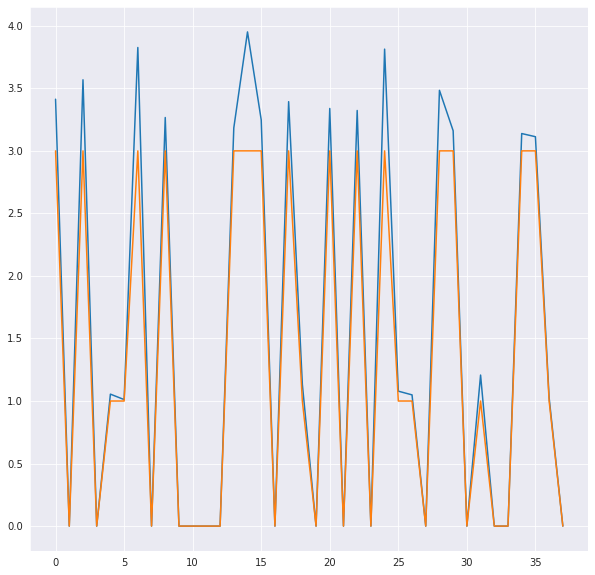

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Leicester_City )

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Leicester_City) 

XN, ZN = new_model.sample(38)

Leicester_City_pontos = Leicester_City['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Leicester_City_pontos)
plt.plot(Leicester_City['pontos'])


total = Leicester_City['pontos'].cumsum()
print(total.tail())

total_prev = Leicester_City_pontos.cumsum()
print(total_prev.tail())

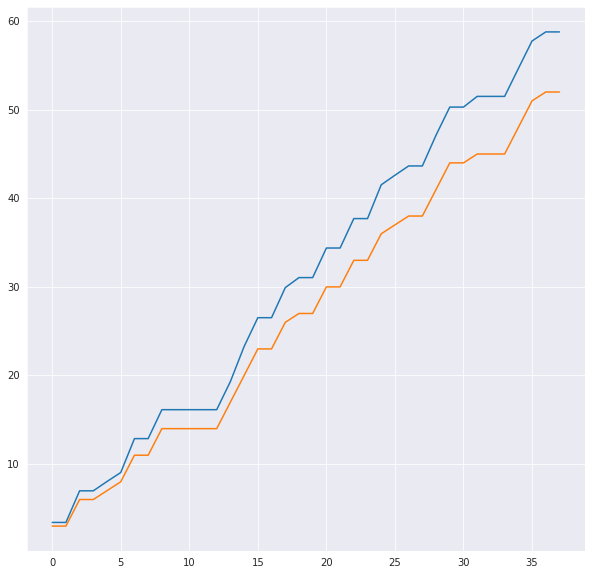

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

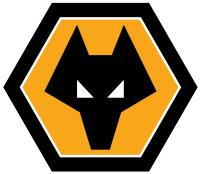



33    54
34    54
35    54
36    57
37    57
Name: pontos, dtype: int64
33    56.916256
34    56.916256
35    56.916256
36    60.015503
37    60.015503
Name: pontos, dtype: float64


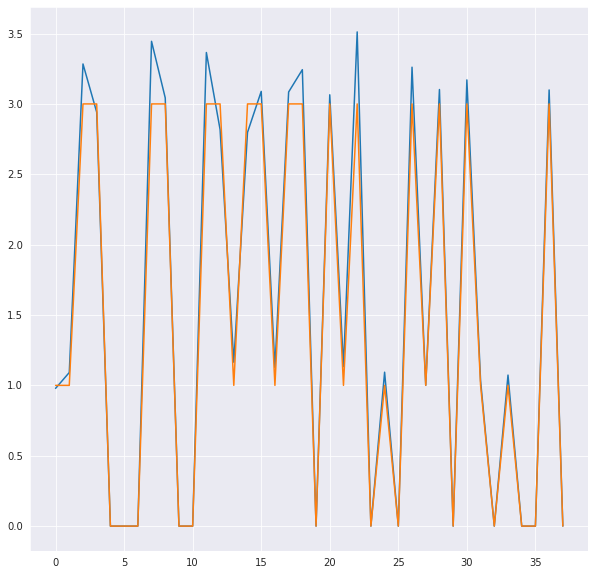

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Wolverhampton_Wanderers )

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Wolverhampton_Wanderers) 

XN, ZN = new_model.sample(38)

Wolverhampton_Wanderers_pontos = Wolverhampton_Wanderers['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Wolverhampton_Wanderers_pontos)
plt.plot(Wolverhampton_Wanderers['pontos'])


total = Wolverhampton_Wanderers['pontos'].cumsum()
print(total.tail())

total_prev =Wolverhampton_Wanderers_pontos.cumsum()
print(total_prev.tail())

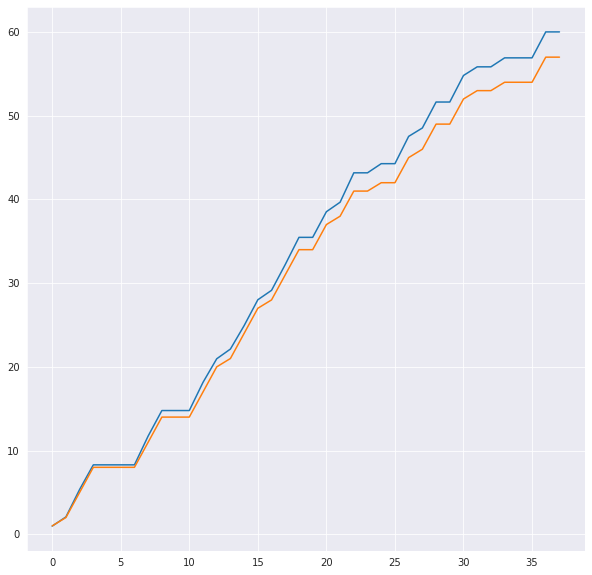

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)


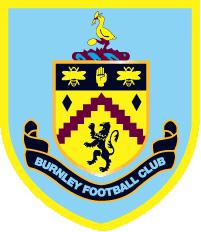



33    36
34    36
35    39
36    40
37    40
Name: pontos, dtype: int64
33    37.439315
34    37.439315
35    40.798771
36    41.815009
37    41.815009
Name: pontos, dtype: float64


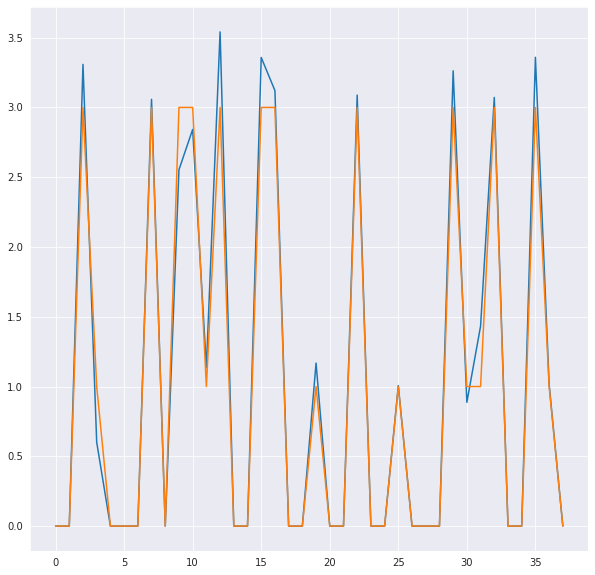

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Burnley )

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Burnley) 

XN, ZN = new_model.sample(38)

Burnley_pontos = Burnley['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Burnley_pontos)
plt.plot(Burnley['pontos'])


total = Burnley['pontos'].cumsum()
print(total.tail())

total_prev = Burnley_pontos.cumsum()
print(total_prev.tail())

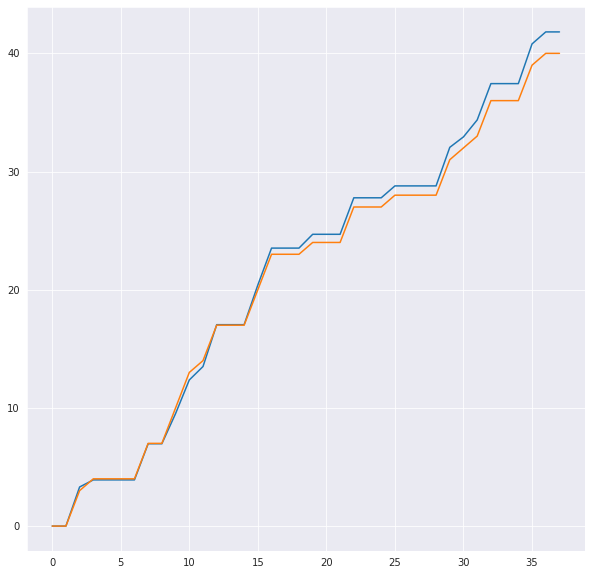

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

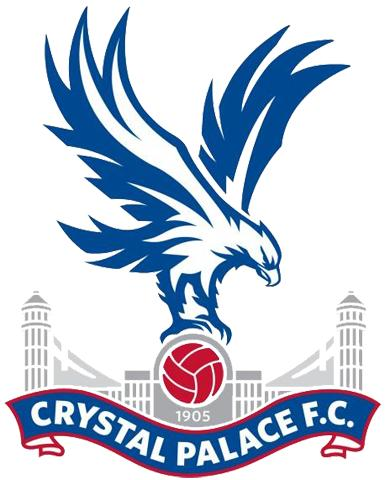

33    40
34    40
35    43
36    46
37    49
Name: pontos, dtype: int64
33    44.757501
34    44.757501
35    48.045714
36    51.100185
37    54.258607
Name: pontos, dtype: float64


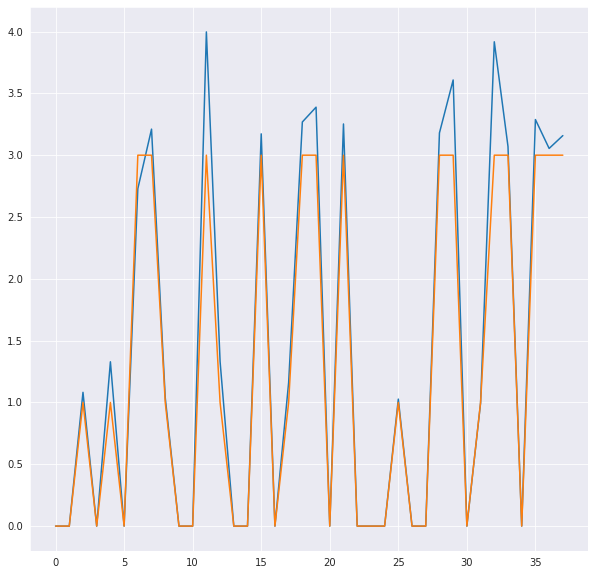

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Crystal_Palace)

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Crystal_Palace) 

XN, ZN = new_model.sample(38)

Crystal_Palace_pontos = Crystal_Palace['pontos']*(1+XN[:,0])


plt.figure(figsize=(10,10))
plt.plot(Crystal_Palace_pontos)
plt.plot(Crystal_Palace['pontos'])


total = Crystal_Palace['pontos'].cumsum()
print(total.tail())

total_prev = Crystal_Palace_pontos.cumsum()
print(total_prev.tail())

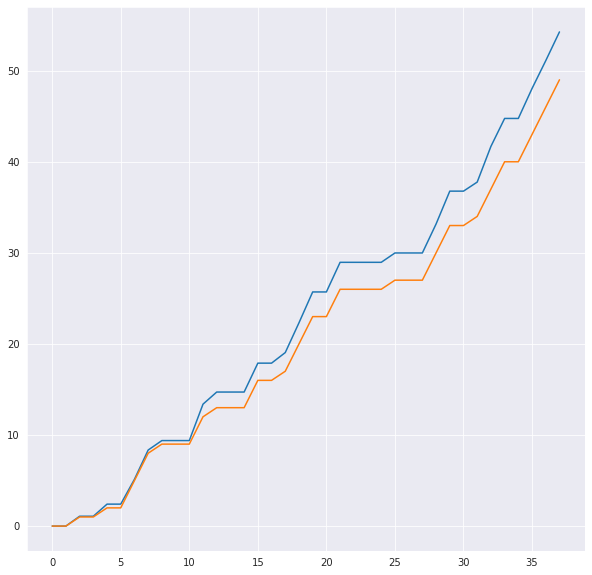

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

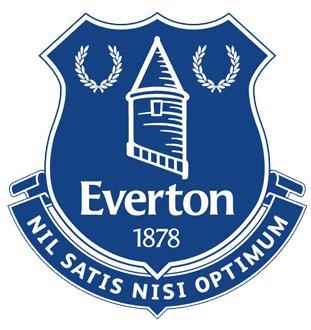

33    49
34    52
35    52
36    53
37    54
Name: pontos, dtype: int64
33    77.574955
34    77.574955
35    77.574955
36    77.574955
37    77.574955
Name: pontos, dtype: float64


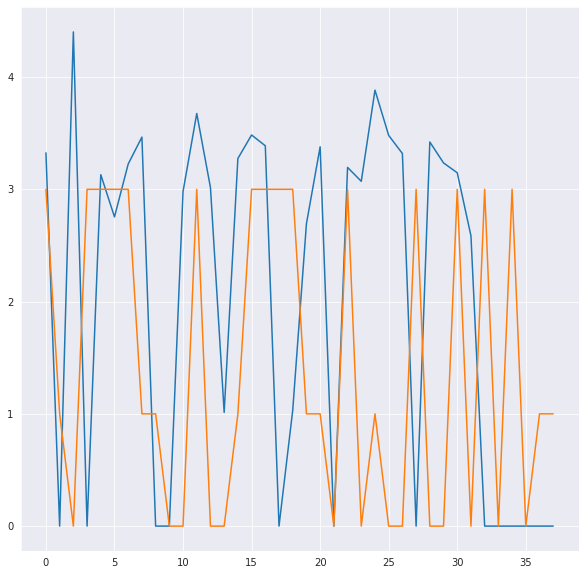

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Everton)

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Everton) 

XN, ZN = new_model.sample(38)

Everton_pontos = Tottenham_Hotspur['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Everton_pontos)
plt.plot(Everton['pontos'])


total = Everton['pontos'].cumsum()
print(total.tail())

total_prev = Everton_pontos.cumsum()
print(total_prev.tail())

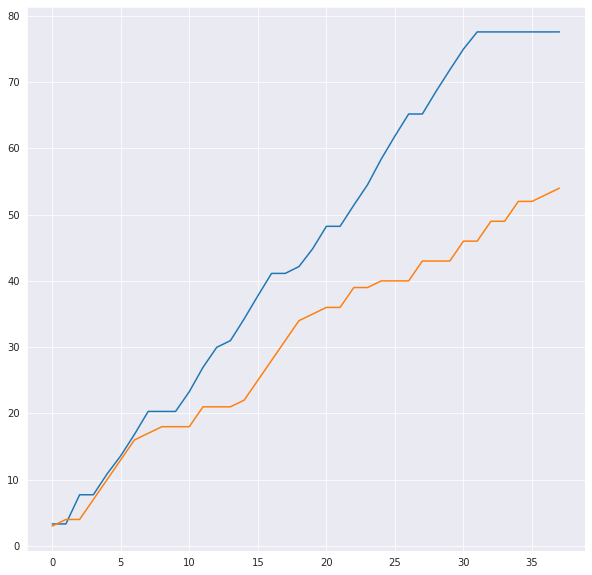

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

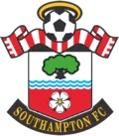

33    35
34    38
35    38
36    39
37    39
Name: pontos, dtype: int64
33    39.053868
34    42.486455
35    42.486455
36    43.599790
37    43.599790
Name: pontos, dtype: float64


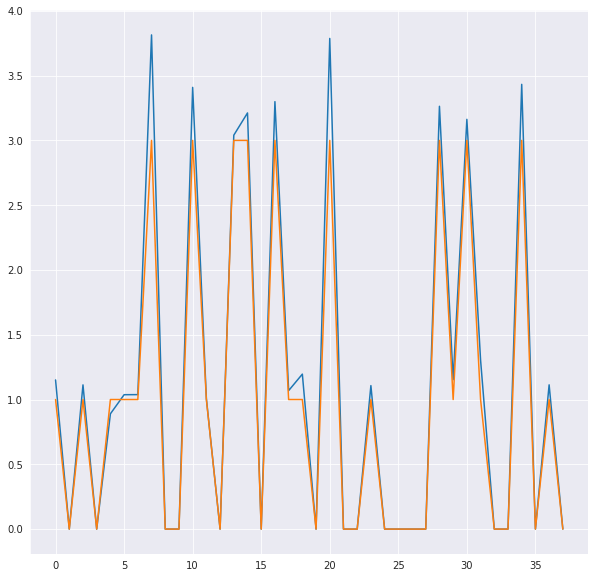

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Southampton)

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Southampton) 

XN, ZN = new_model.sample(38)

Southampton_pontos = Southampton['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Southampton_pontos)
plt.plot(Southampton['pontos'])


total = Southampton['pontos'].cumsum()
print(total.tail())

total_prev = Southampton_pontos.cumsum()
print(total_prev.tail())

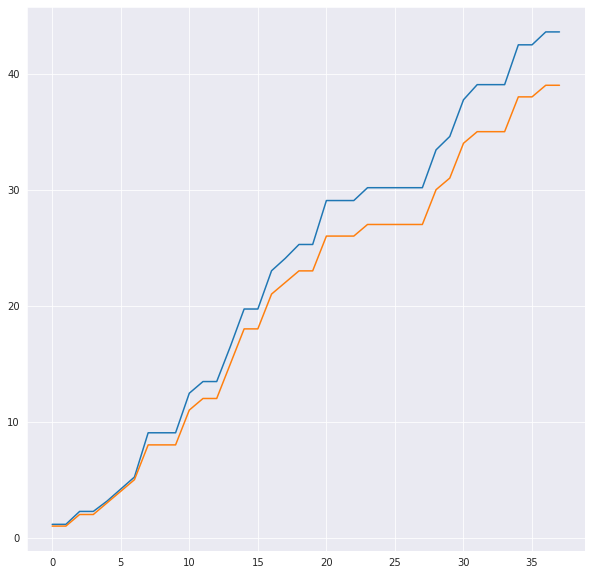

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

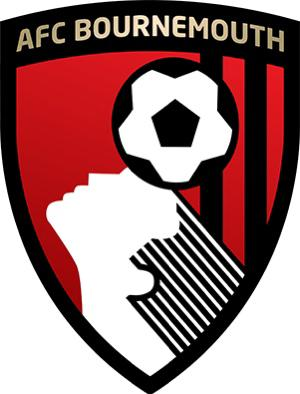

33    41
34    41
35    44
36    45
37    45
Name: pontos, dtype: int64
33    45.732730
34    45.732730
35    49.176287
36    50.263224
37    50.263224
Name: pontos, dtype: float64


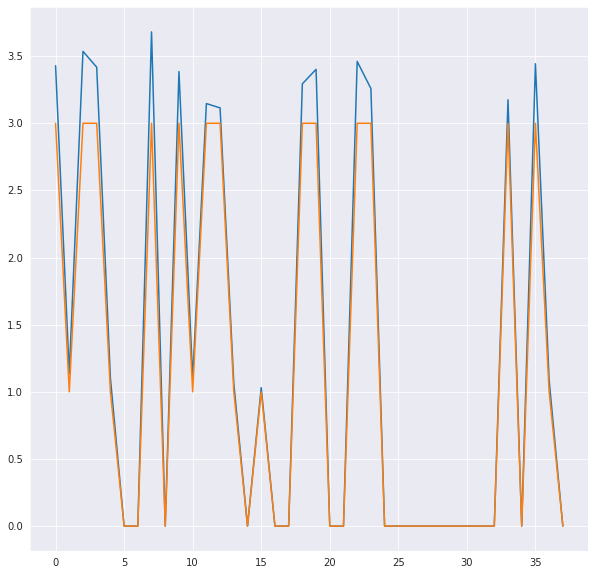

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_AFC_Bournemouth)

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_AFC_Bournemouth) 

XN, ZN = new_model.sample(38)

AFC_Bournemouth_pontos = AFC_Bournemouth['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(AFC_Bournemouth_pontos)
plt.plot(AFC_Bournemouth['pontos'])


total = AFC_Bournemouth['pontos'].cumsum()
print(total.tail())

total_prev = AFC_Bournemouth_pontos.cumsum()
print(total_prev.tail())

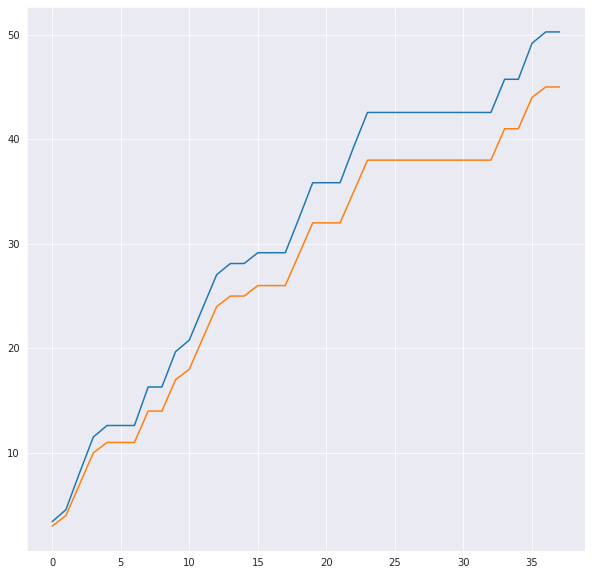

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

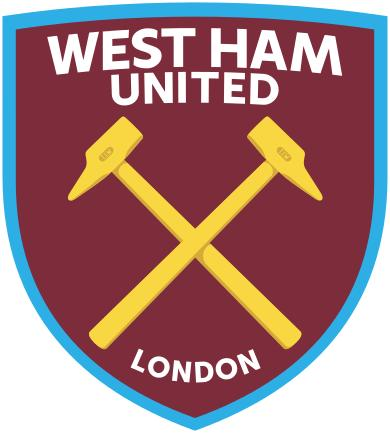

33    46
34    46
35    46
36    49
37    52
Name: pontos, dtype: int64
33    49.668773
34    49.668773
35    49.668773
36    53.000012
37    56.608589
Name: pontos, dtype: float64


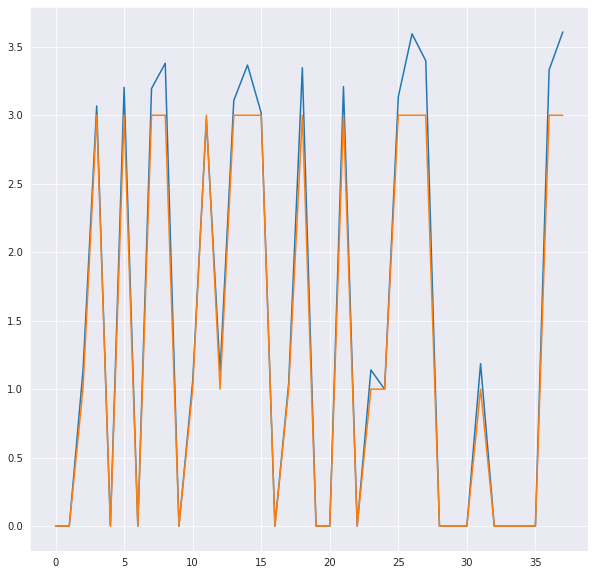

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_West_Ham_United)

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_West_Ham_United) 

XN, ZN = new_model.sample(38)

West_Ham_United_pontos = West_Ham_United['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(West_Ham_United_pontos)
plt.plot(West_Ham_United['pontos'])


total = West_Ham_United['pontos'].cumsum()
print(total.tail())

total_prev = West_Ham_United_pontos.cumsum()
print(total_prev.tail())

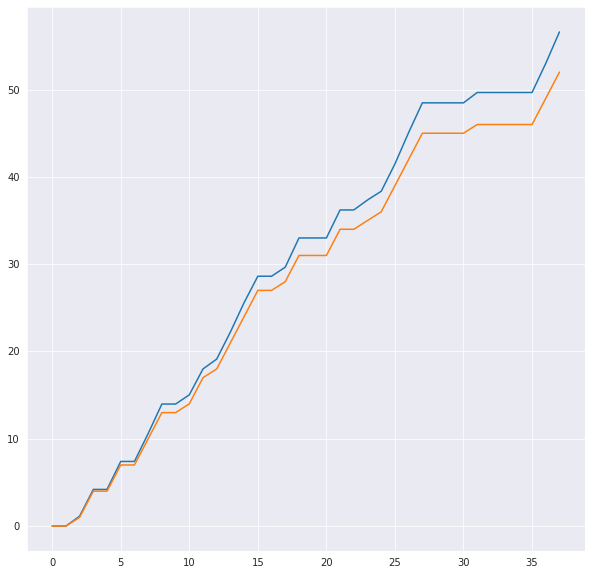

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

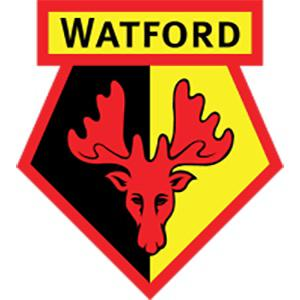

33    47
34    47
35    47
36    50
37    50
Name: pontos, dtype: int64
33    50.334130
34    50.334130
35    50.334130
36    53.867405
37    53.867405
Name: pontos, dtype: float64


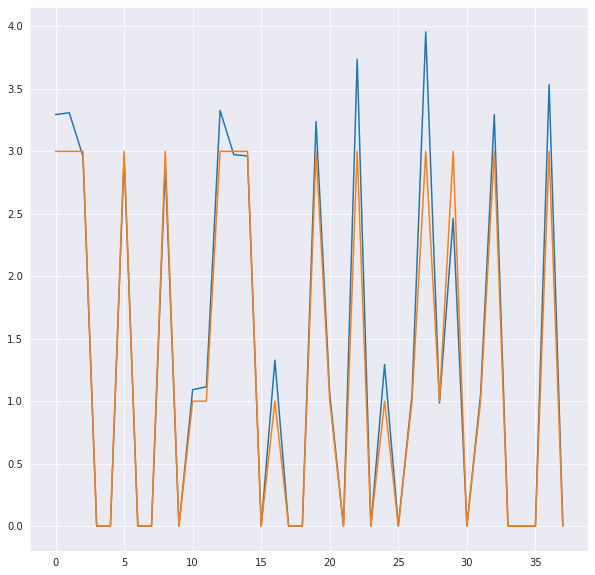

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Watford)

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Watford) 

XN, ZN = new_model.sample(38)

Watford_pontos = Watford['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Watford_pontos)
plt.plot(Watford['pontos'])


total = Watford['pontos'].cumsum()
print(total.tail())

total_prev = Watford_pontos.cumsum()
print(total_prev.tail())

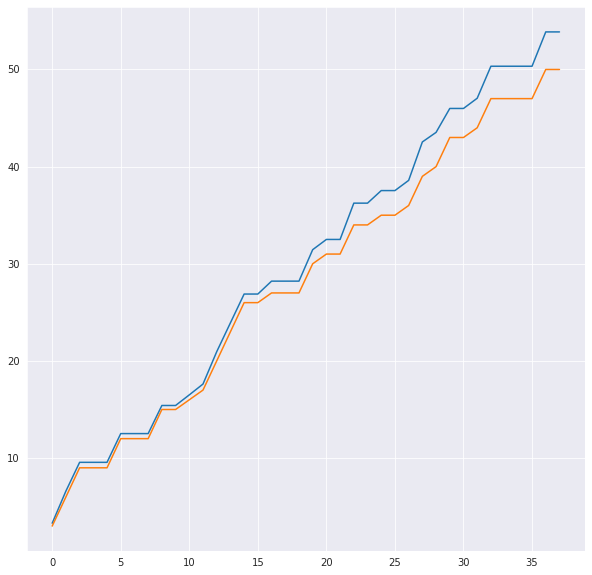

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

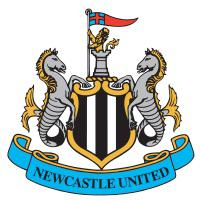

33    38
34    38
35    41
36    42
37    45
Name: pontos, dtype: int64
33    40.173268
34    43.743478
35    43.743478
36    44.674473
37    44.674473
Name: pontos, dtype: float64


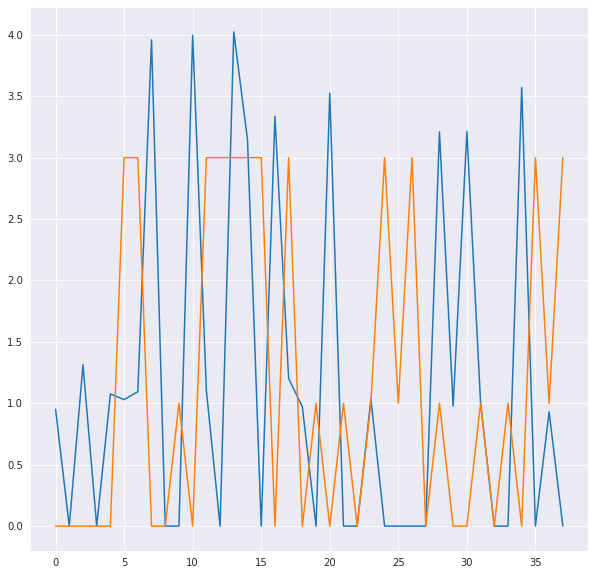

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Newcastle_United)

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Newcastle_United) 

XN, ZN = new_model.sample(38)

Newcastle_United_pontos = Southampton['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Newcastle_United_pontos)
plt.plot(Newcastle_United['pontos'])


total = Newcastle_United['pontos'].cumsum()
print(total.tail())

total_prev = Newcastle_United_pontos.cumsum()
print(total_prev.tail())

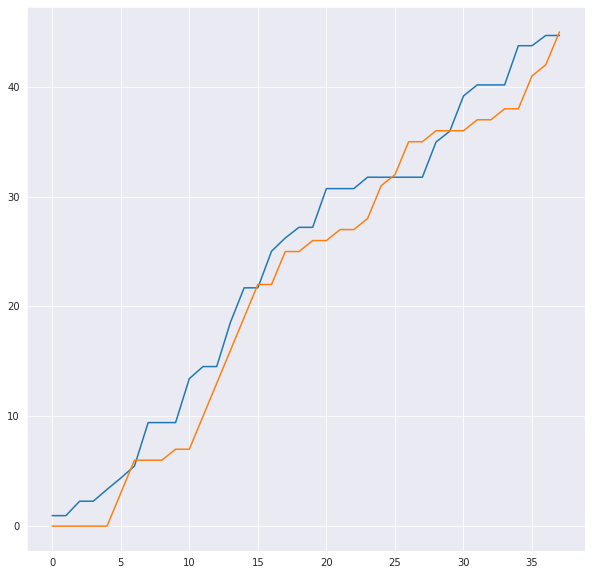

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

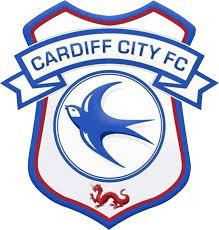

33    28
34    28
35    31
36    31
37    34
Name: pontos, dtype: int64
33    28.618911
34    28.618911
35    31.687715
36    31.687715
37    35.733672
Name: pontos, dtype: float64


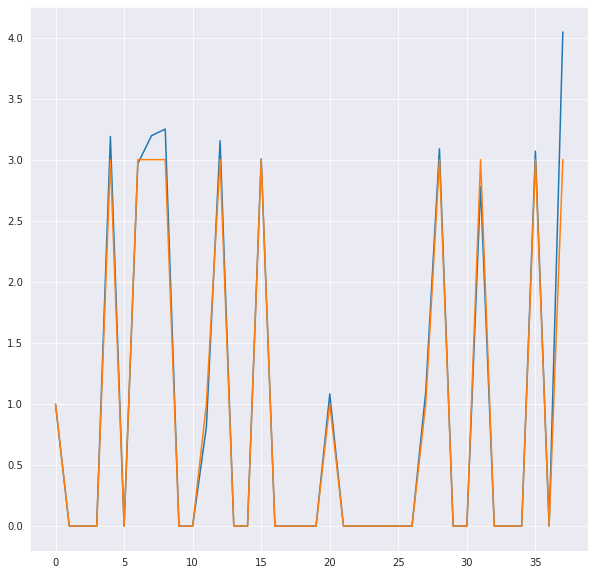

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Cardiff_City)

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Cardiff_City) 

XN, ZN = new_model.sample(38)

Cardiff_City_pontos = Cardiff_City['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Cardiff_City_pontos)
plt.plot(Cardiff_City['pontos'])


total = Cardiff_City['pontos'].cumsum()
print(total.tail())

total_prev = Cardiff_City_pontos.cumsum()
print(total_prev.tail())

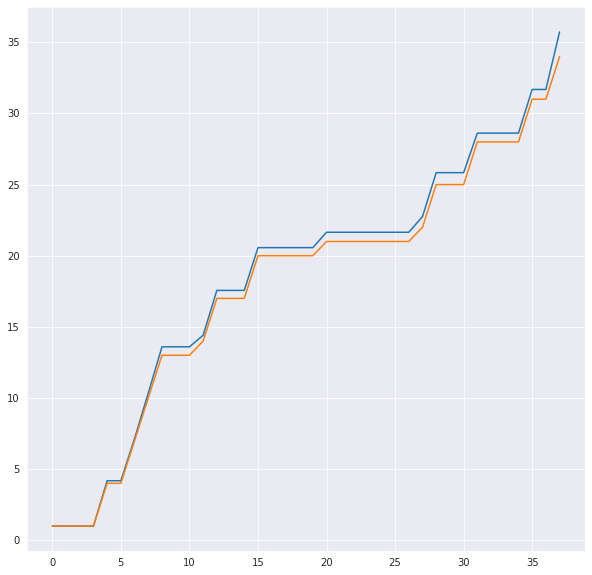

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

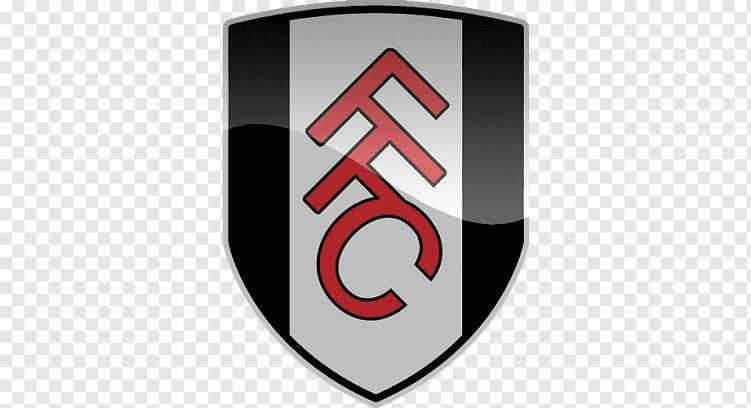

33    23
34    23
35    23
36    26
37    26
Name: pontos, dtype: int64
33    24.690477
34    24.690477
35    24.690477
36    28.119503
37    28.119503
Name: pontos, dtype: float64


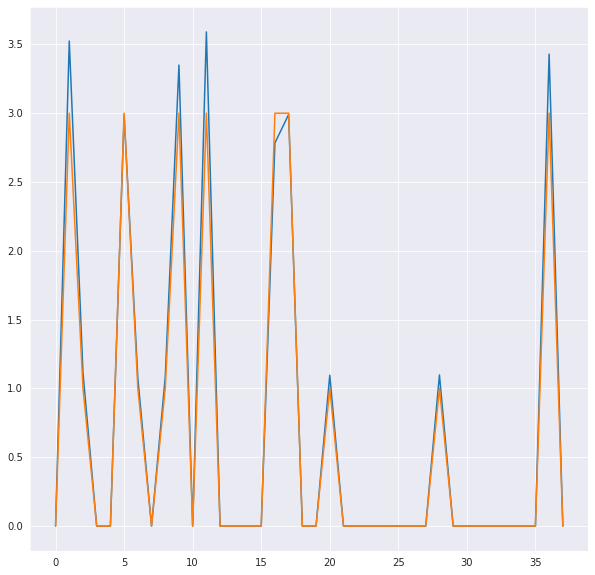

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Fulham)

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Fulham) 

XN, ZN = new_model.sample(38)

Fulham_pontos = Fulham['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Fulham_pontos)
plt.plot(Fulham['pontos'])


total = Fulham['pontos'].cumsum()
print(total.tail())

total_prev =Fulham_pontos.cumsum()
print(total_prev.tail())

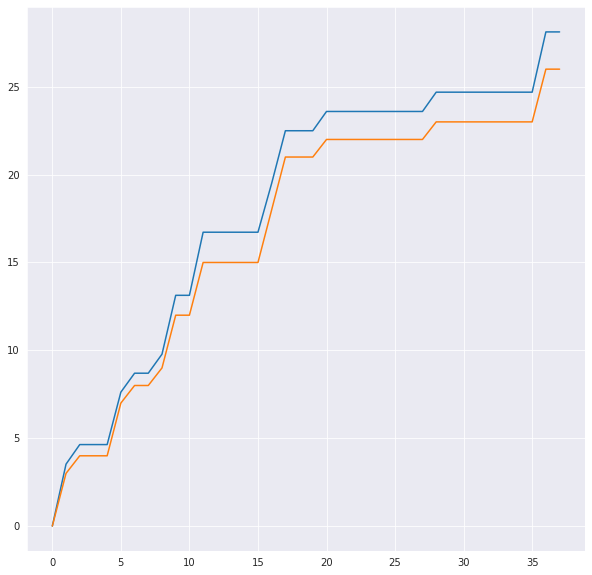

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

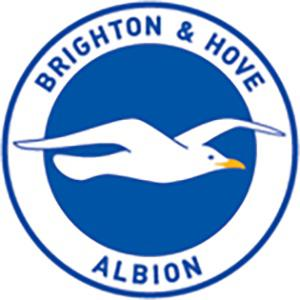

33    34
34    34
35    35
36    35
37    36
Name: pontos, dtype: int64
33    39.544937
34    39.544937
35    40.684296
36    40.684296
37    41.803303
Name: pontos, dtype: float64


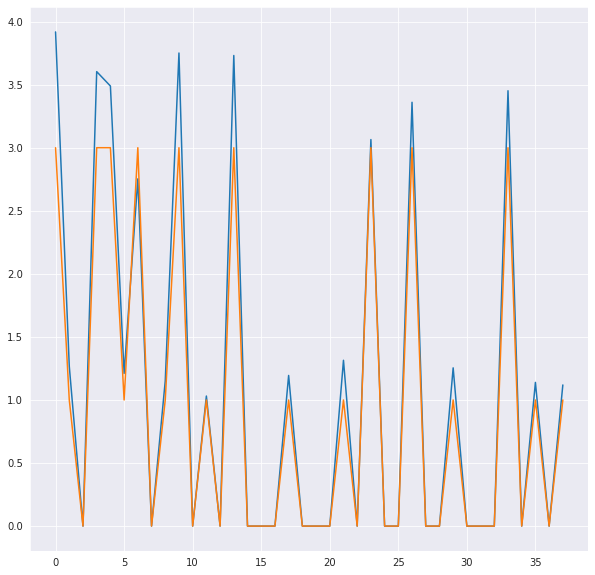

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Brighton_e_Hove_Albion)

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Brighton_e_Hove_Albion) 

XN, ZN = new_model.sample(38)

Brighton_e_Hove_Albion_pontos = Brighton_e_Hove_Albion['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Brighton_e_Hove_Albion_pontos)
plt.plot(Brighton_e_Hove_Albion['pontos'])


total = Brighton_e_Hove_Albion['pontos'].cumsum()
print(total.tail())

total_prev = Brighton_e_Hove_Albion_pontos.cumsum()
print(total_prev.tail())

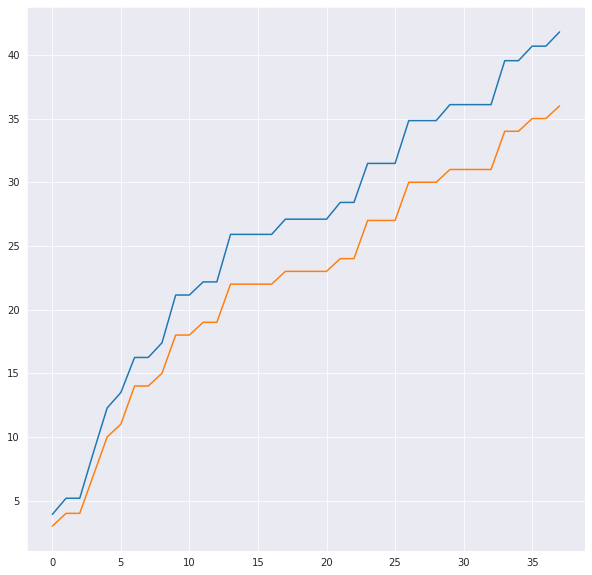

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

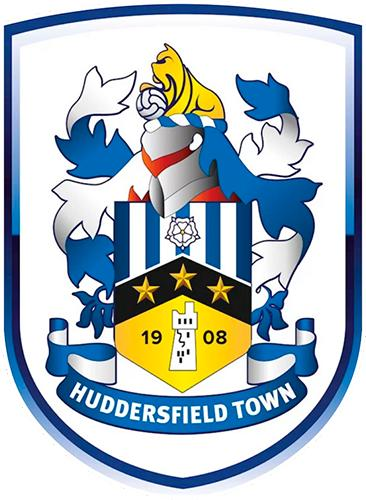

33    15
34    15
35    15
36    15
37    16
Name: pontos, dtype: int64
33    16.155863
34    16.155863
35    16.155863
36    16.155863
37    17.146528
Name: pontos, dtype: float64


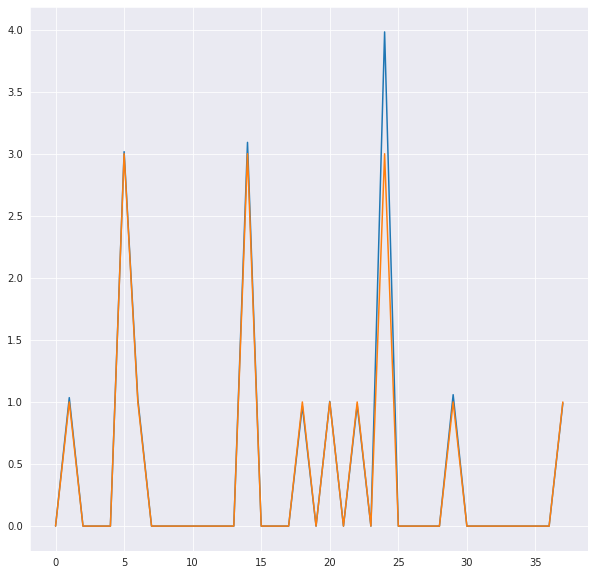

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full").fit(X_Huddersfield_Town)

new_model  = hmm.GaussianHMM(n_components=2,covariance_type="full")
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_ 
new_model.means_ = model.means_
new_model.covars_ = model.covars_

X_N = new_model.predict(X_Huddersfield_Town) 

XN, ZN = new_model.sample(38)

Huddersfield_Town_pontos = Huddersfield_Town['pontos']*(1+XN[:,0])

plt.figure(figsize=(10,10))
plt.plot(Huddersfield_Town_pontos)
plt.plot(Huddersfield_Town['pontos'])


total = Huddersfield_Town['pontos'].cumsum()
print(total.tail())

total_prev = Huddersfield_Town_pontos.cumsum()
print(total_prev.tail())

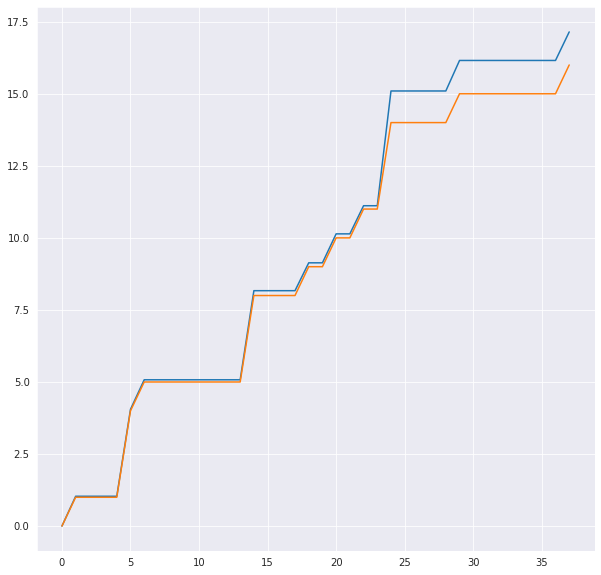

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(total_prev)
plt.plot(total)

#conclusão


Inicialmente feito uma análise em cima dos df's e o escolhido foi o df_jogos. foi ultilizado diversos classificadores para ver qual apresentava o melhor resultado, sendo o melhor a Logistic Regression!

Foi feito um estudo utilizando serie temporal, Markov HMM visto na aula da bolsa de valores! como esse problema era bem aberto, não se tinha definido o 'Y' que normalmente é nos dados, então foi criado outra feature de pontos que dependia de vitória (+3), empate (+1) ou derrota (0)! Foi observado que o modelo Marvok apresenta um otimo resultado e acompanhou bem os pontos reais tendo o Manchester city como campeão!

